# Introduction
DOTA 2 is a popular online Moba (Multiplayer online battle arena) game that is played between two teams consisting of five players with each team defeating their opponents. Each Player chooses from over 115 heroes. The main objective of the game is to destroy the opponent teams, called the "Ancient". Each hero has unique abilities.  The abilities of a hero can be used to counter a different hero. (For example: A hero named Riki deals more damage when he hits the opponents from behind but in comparison, a Bristleback takes less damage when gets hit from the opponents from behind)  and hence there is a draft advantage to the team which has smarter picks against the opponents.

### What are we trying to do ?

The focus of this project is to predict the winning team based on the features win-rates and pick-rates using data set to supplement with training data and testing data to generate reliable models.

Before we proceed let's define some essential concepts which are to be known.

# Feature Engineering
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. We have engineered the following:


a)	Winrate: All the heroes in DotA 2 don’t have the same win rate. Some heroes win way more games than other heroes. 
The win rate values are normalized to fit between 0 and 1. 
Then multiplied to training dataset. This features value ranges from -1 to 1.


b)	Pickrate: Some heroes are more popular than other heroes among players. 
This might affect the outcome of the game and hence taken as a feature. 
Extracted in the same way as winrate


c)	Winrate*pickrate: In our model we selected these features named win rate and pick rate and estimated their products. 



### Let's get started!


We still start off by obtaining the dataset which we are going to use.



The dataset has been obtained from https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results

•	We are using a dataset from UCI repository [1] 


•	The dataset  has 100,000 matches in which 90,000 will be used for training the model and 10,000 are used for testing the model 



•	We are using techniques like Logistic Regression, Random Forests, Gradient Boosting and Multilayer Perceptron. Multilayer Perceptron model

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
import h2o
h2o.init()
h2o.remove_all()
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\manor\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\manor\AppData\Local\Temp\tmppjdko4ul
  JVM stdout: C:\Users\manor\AppData\Local\Temp\tmppjdko4ul\h2o_manor_started_from_python.out
  JVM stderr: C:\Users\manor\AppData\Local\Temp\tmppjdko4ul\h2o_manor_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,"21 days, 6 hours and 37 minutes"
H2O cluster name:,H2O_from_python_manor_0ra6id
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [2]:
train_data = pd.read_csv("dota2Dataset/dota2Train.csv")
train_data.head()

,Win,clusterID,GameMode,GameType,AM,AXE,BANE,BS,CM,DROW,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


# Segregating heroes 

Heros are segrated from the data as we will be woeking on them to engineer our features

In [3]:
variables = train_data.iloc[:,4:]
variables

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,-1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
test = variables['PUDGE'].value_counts().tolist()
pick_rate = (test[1] + test[2])/(test[0]+test[1]+test[2])*100
pick_rate

30.528872099298436

Heroes have diffrent pickrates and winrates below code shows that radiant has a clear advantage over dire 

# Finding Winrate based on side

In [5]:
 def target(row):
    if row['Win'] == -1 :
        val = 0
    else:
        val = 1
    return val
train_data['Y'] = train_data.apply(target,axis = 1)
train_data['Y'].value_counts()

1    48782
0    43868
Name: Y, dtype: int64

In [6]:
#winrate radiant 
winrate_radiant = (48782/(48782+43868)) *100
winrate_radiant

52.651915812196435

In [7]:
variables.describe()

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
count,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,...,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000
mean,-0.001630,-0.000971,0.000691,-0.000799,-0.002008,0.003173,-0.000345,-0.003832,0.005979,0.001543,...,-0.000766,-0.001371,-0.000950,0.000885,0.000594,0.001025,0.000648,-0.000227,-0.000043,0.000896
std,0.402004,0.467672,0.165052,0.355393,0.329348,0.483950,0.348865,0.501760,0.588109,0.325344,...,0.253609,0.535024,0.206112,0.283985,0.155940,0.220703,0.204166,0.168707,0.189868,0.139033
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# function to find hero winrates
def hero_winrates(col):
    hero_win = 0           # for winrate
    total_games = 0        # for winrate 
    hero_pick = 0          # for picks
    total_pick_games = 0   # for picks
    hero_radiant_win = 0   #for radiant winrate
    hero_dire_win = 0      #for dire winrate
    hero_radiant_total_games = 0 #for radiant winrate
    hero_dire_total_games = 0 # for dire winrate
    for index, row in train_data.iterrows():     # 
        
        if row[col] == row['Win']:             
            hero_win = hero_win + 1
            total_games = total_games + 1
            
            if row['Win'] == 1:
                hero_radiant_win = hero_radiant_win + 1
                hero_radiant_total_games =  hero_radiant_total_games +1
            
            elif row['Win'] == -1:
                hero_dire_win = hero_dire_win + 1
                hero_dire_total_games = hero_dire_total_games + 1
        
        elif row[col]!= row['Win'] and row[col] != 0:
            total_games = total_games + 1
            if row[col] == 1:
                hero_radiant_total_games =  hero_radiant_total_games +1
            else :
                hero_dire_total_games = hero_dire_total_games + 1
        
        if row[col]!= 0:
            hero_pick = hero_pick + 1
            total_pick_games = total_pick_games + 1
        
        else :
            total_pick_games = total_pick_games + 1
    
            
    hero_win_rate = hero_win/total_games
    hero_radiant_win_rate = hero_radiant_win/hero_radiant_total_games
    hero_dire_win_rate = hero_dire_win/hero_dire_total_games
    hero_pick_rate = hero_pick/total_pick_games
    return hero_win_rate,hero_radiant_win_rate,hero_dire_win_rate,hero_pick_rate
    
total_winrates_array = []
radiant_winrates_array = []
dire_winrates_array = []
hero_pickrates_array = []
for col_names in list(variables):
    hero_win_rate,hero_radiant_win_rate,hero_dire_win_rate,hero_pick_rate = hero_winrates(col_names)
    total_winrates_array.append(hero_win_rate)
    radiant_winrates_array.append(hero_radiant_win_rate)
    dire_winrates_array.append(hero_dire_win_rate)
    hero_pickrates_array.append(hero_pick_rate)

In [9]:
#total_winrates_array

# Putting winrates in dataframes
the extracted values are all stored from 

In [10]:
hero_list = list(variables)
hero_winrate_df  = pd.DataFrame(total_winrates_array)
hero_winrate_df = hero_winrate_df.T
hero_winrate_df = hero_winrate_df*100
hero_winrate_df.columns = hero_list
hero_raidant_winrate_df  = pd.DataFrame(radiant_winrates_array)
hero_raidant_winrate_df = hero_raidant_winrate_df.T
hero_raidant_winrate_df = hero_raidant_winrate_df*100
hero_raidant_winrate_df.columns = hero_list
hero_dire_winrate_df  = pd.DataFrame(dire_winrates_array)
hero_dire_winrate_df = hero_dire_winrate_df.T
hero_dire_winrate_df = hero_dire_winrate_df*100
hero_dire_winrate_df.columns = hero_list
hero_pickrates_df  = pd.DataFrame(hero_pickrates_array)
hero_pickrates_df = hero_pickrates_df.T
hero_pickrates_df = hero_pickrates_df*100
hero_pickrates_df.columns = hero_list

In [75]:
hero_pickrates_df


,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0.161608,0.218716,0.027242,0.126303,0.108473,0.234215,0.121705,0.251775,0.345904,0.10585,...,0.064317,0.286249,0.042482,0.080648,0.024317,0.04871,0.041684,0.028462,0.03605,0.019331


# Box plot for hero winrates

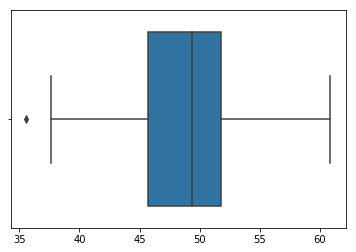

In [12]:
sns.boxplot(hero_winrate_df)

In [13]:
#sns.pairplot(hero_winrate_df)

# Hero winrates visualised

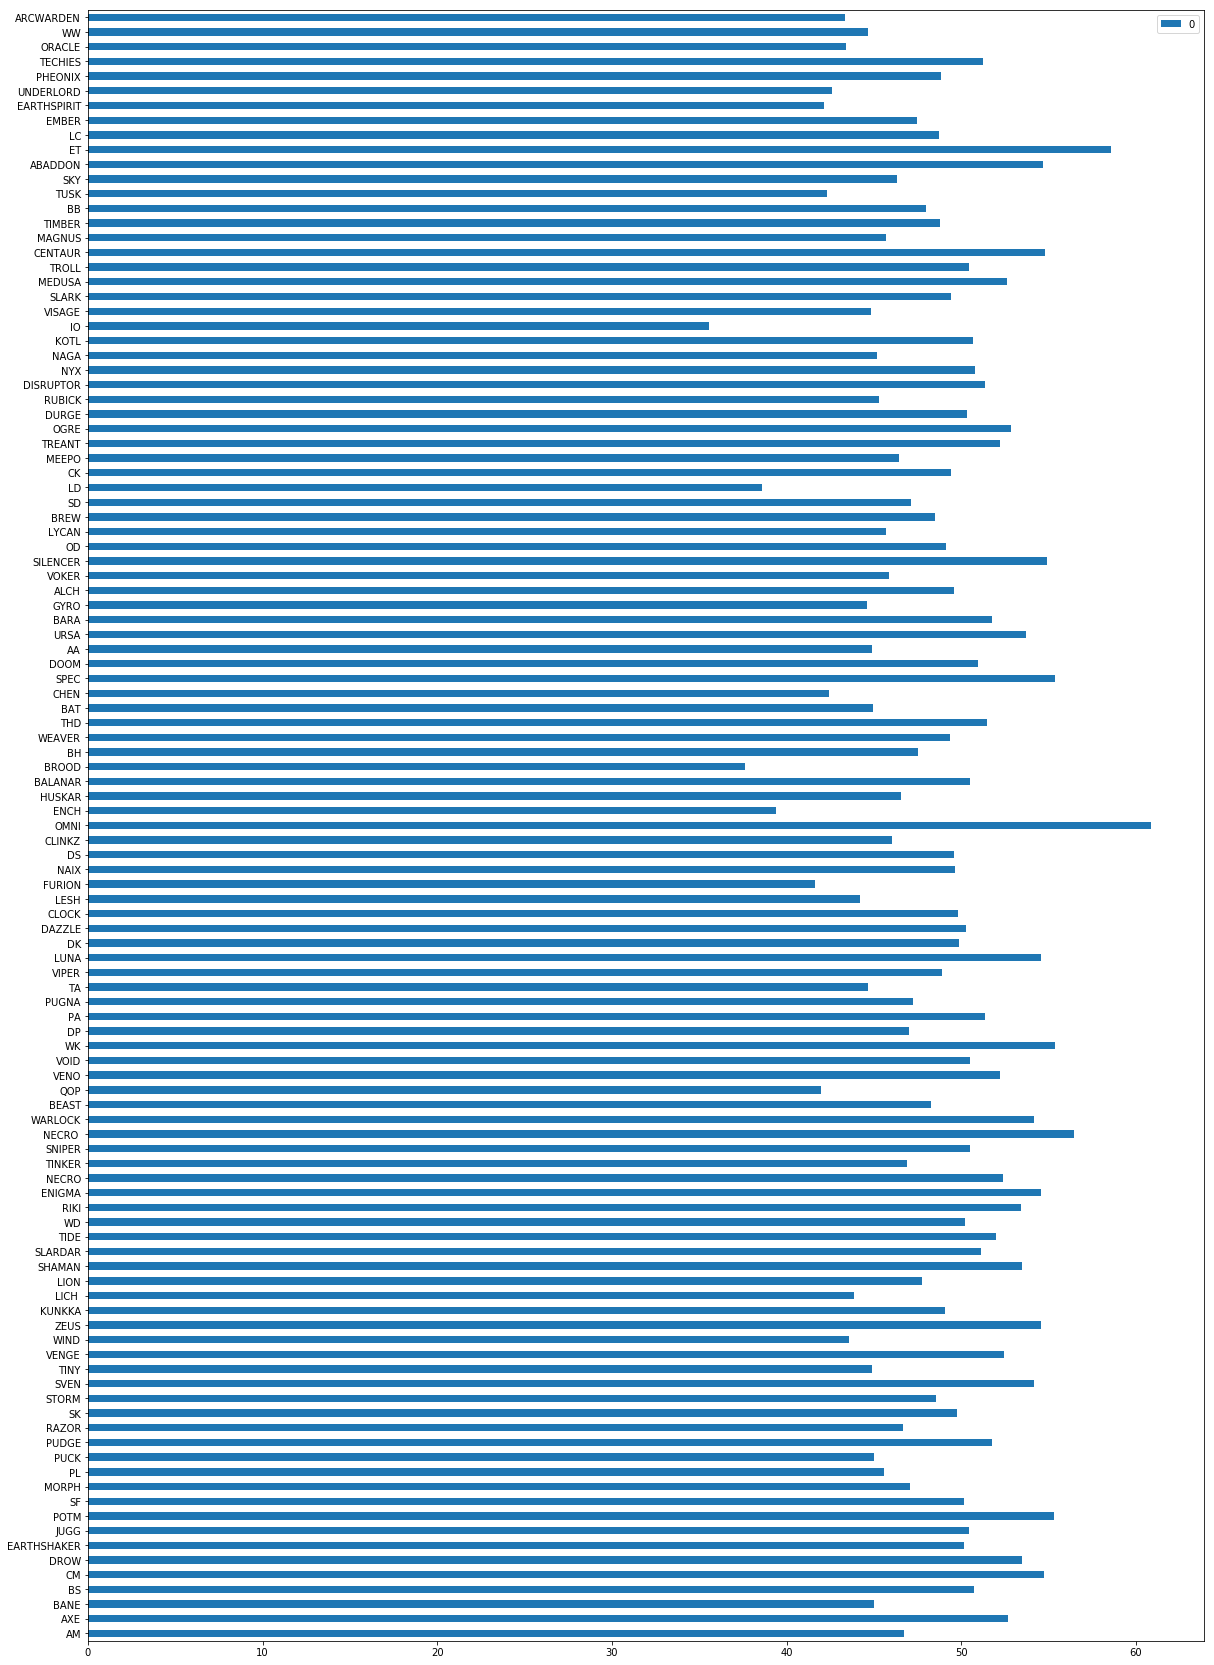

In [14]:
hero_winrate_df.T.plot.barh(figsize= (20,30))


# Radiant Winrates of heroes

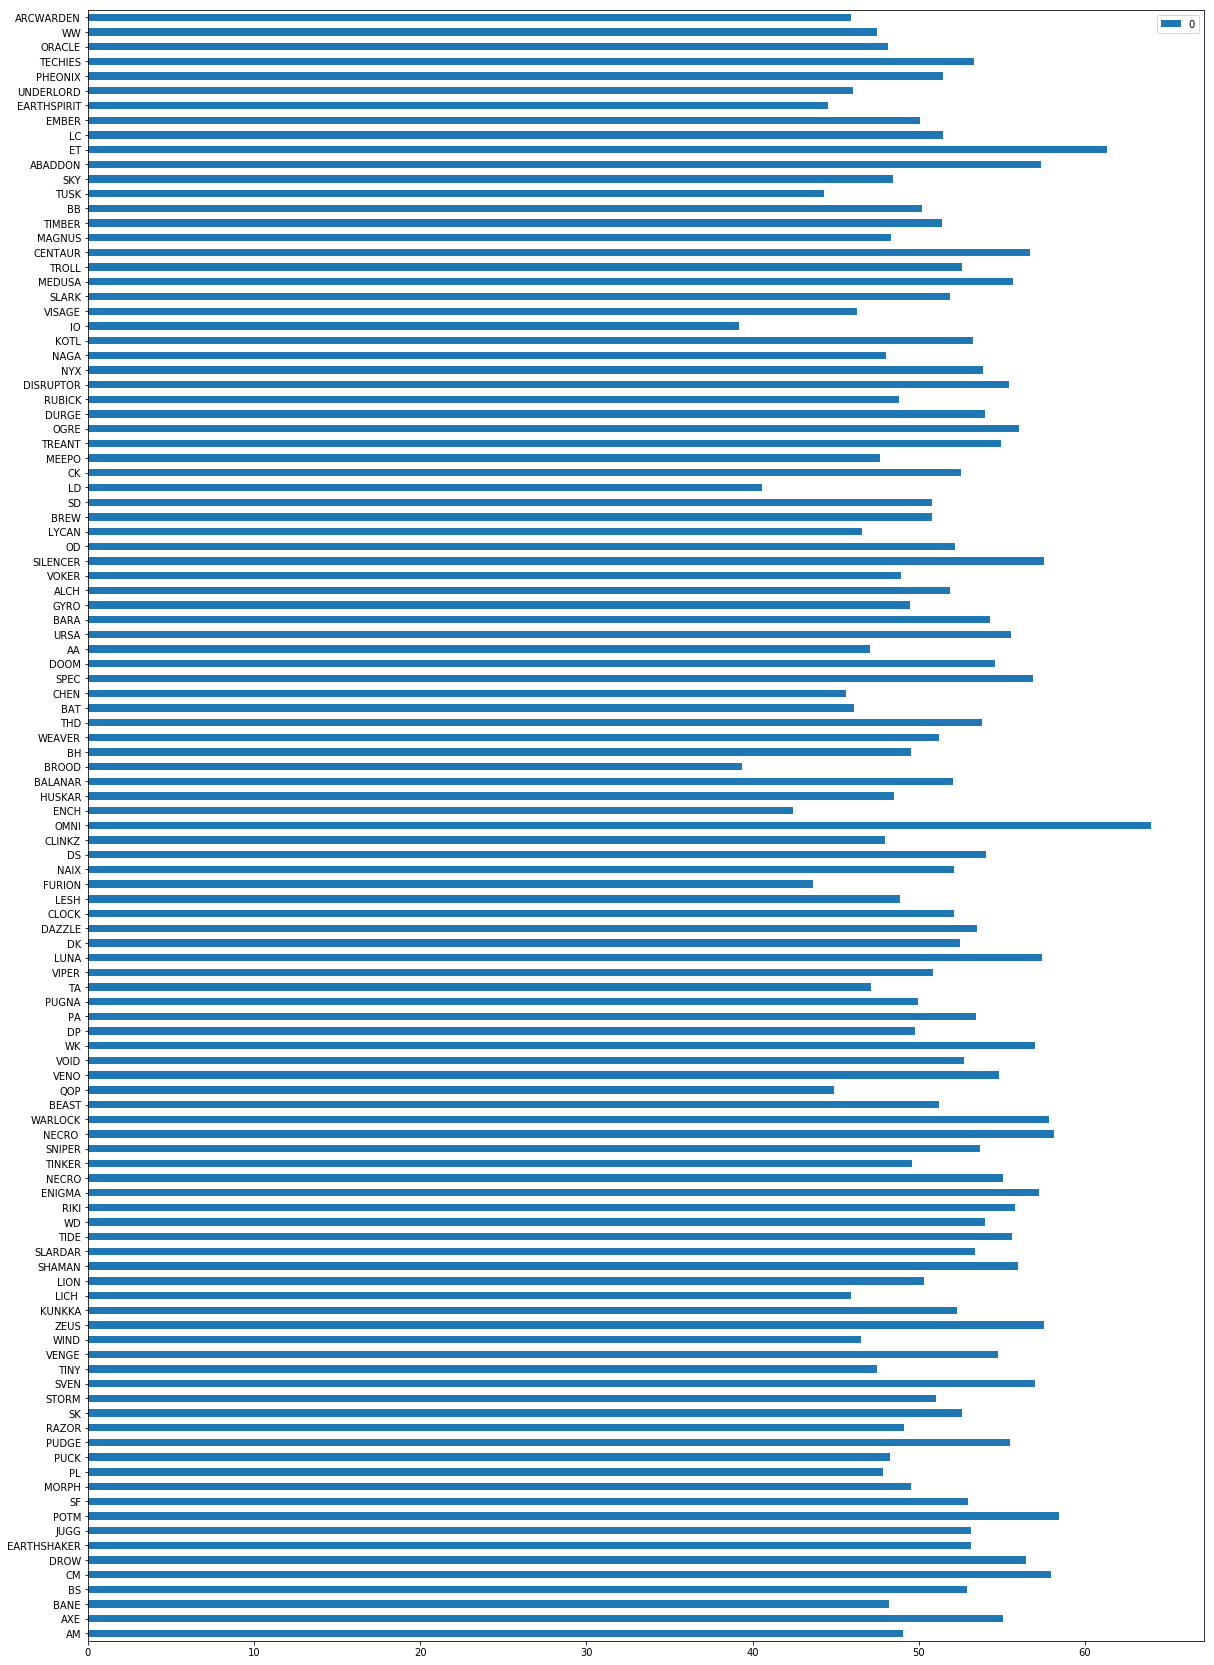

In [15]:
hero_raidant_winrate_df.T.plot.barh(figsize= (20,30))

# Dire Winrate of Heroes

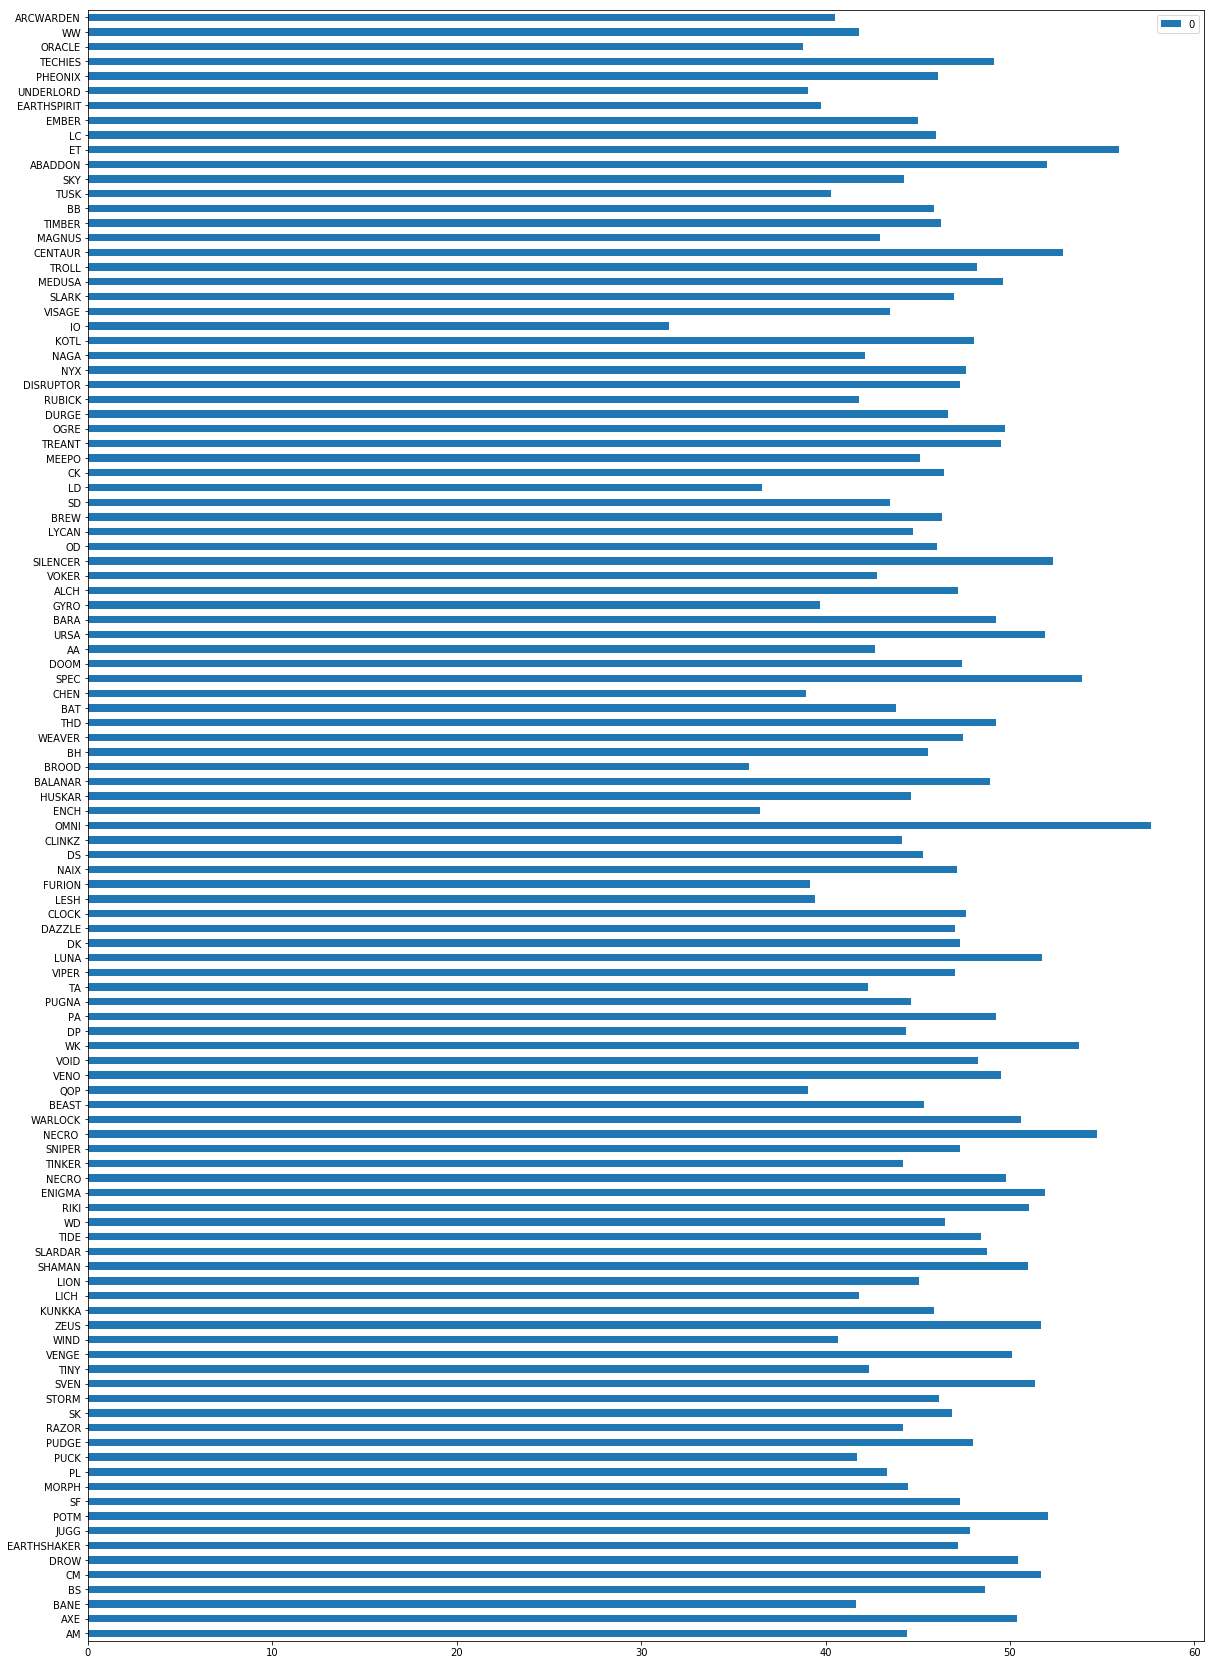

In [16]:
hero_dire_winrate_df.T.plot.barh(figsize= (20,30))

# Hero Pick rates

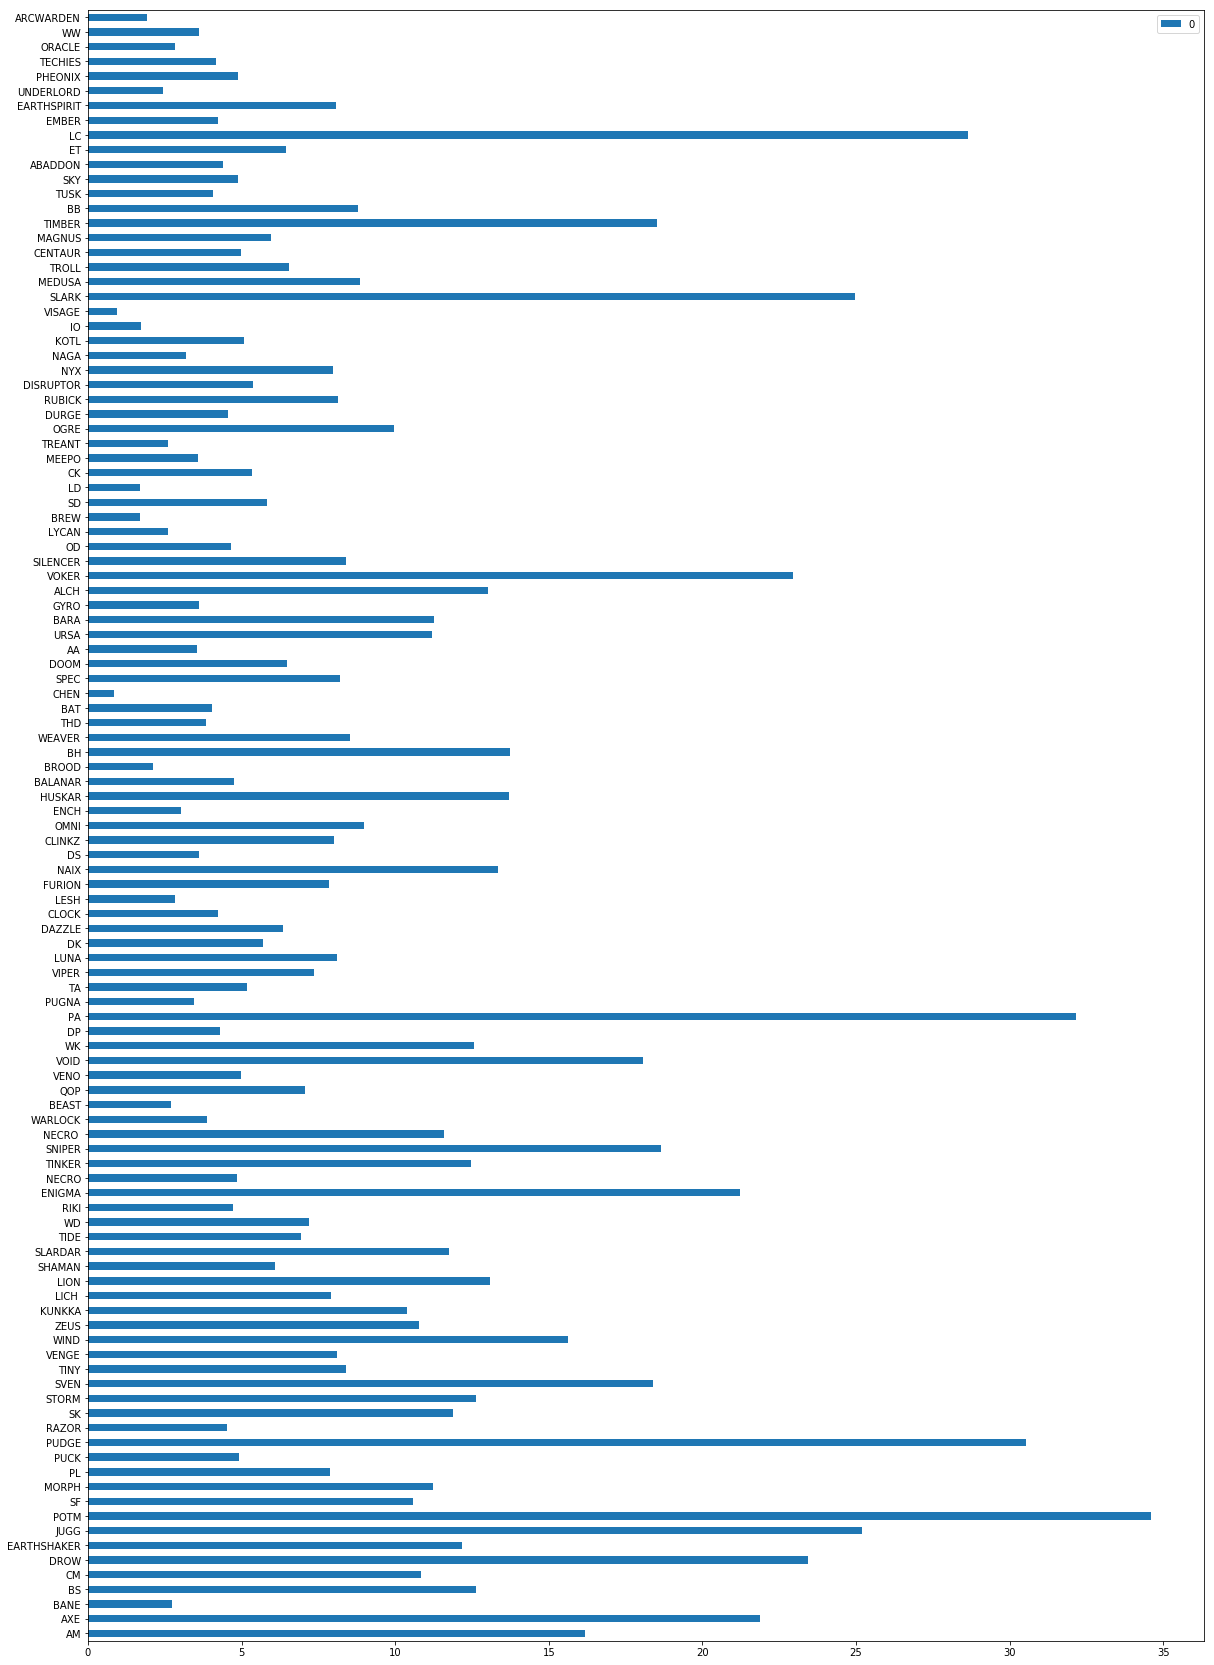

In [17]:
hero_pickrates_df.T.plot.barh(figsize= (20,30))

# Radiant and Dire winrates Compared


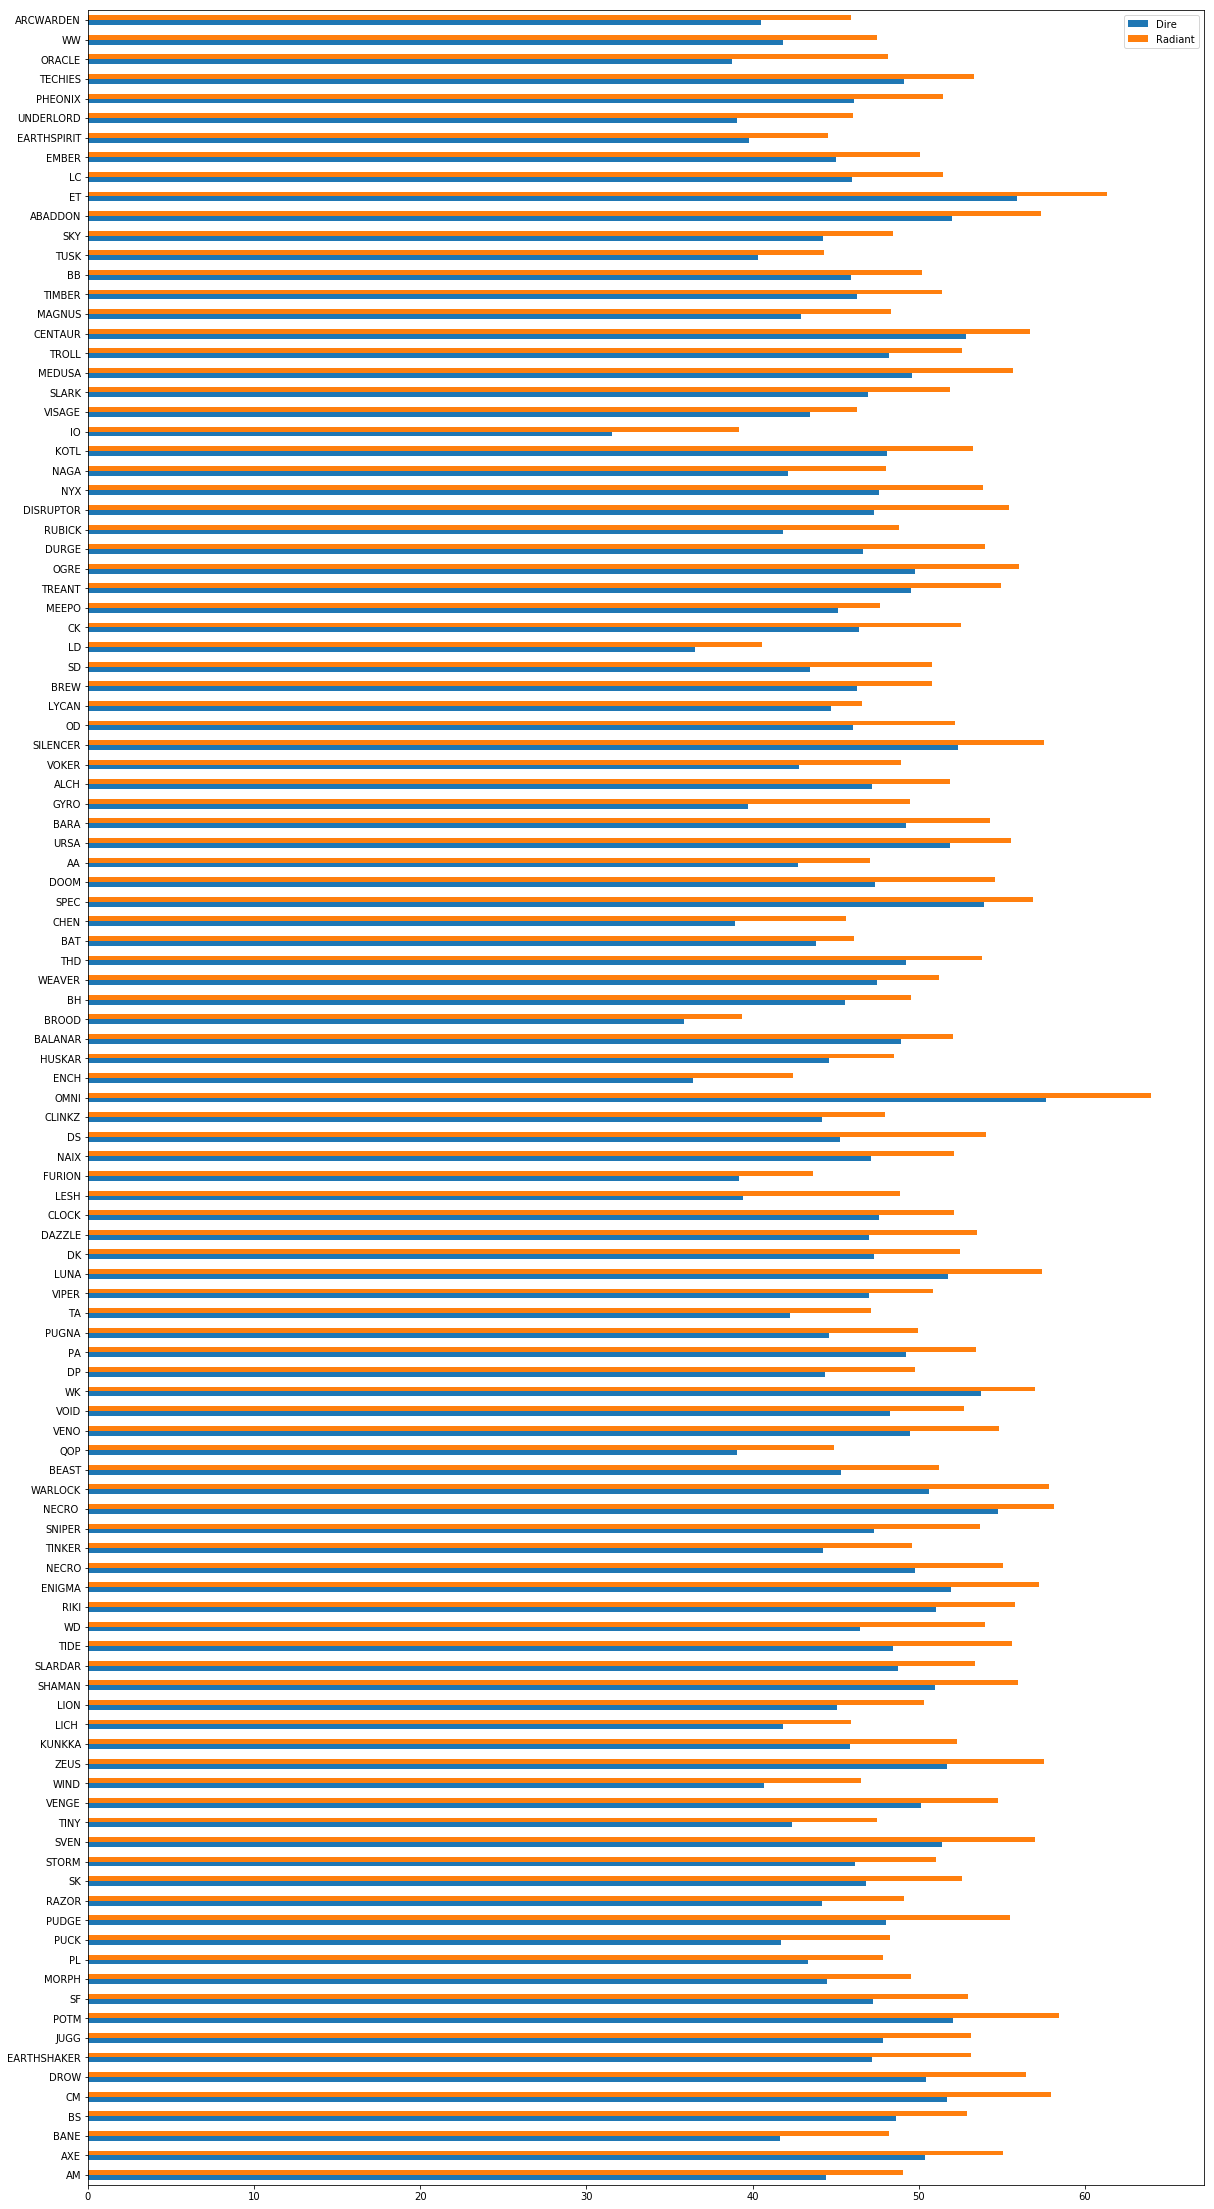

In [18]:
radiant_dire_df = pd.concat([hero_dire_winrate_df,hero_raidant_winrate_df])
radiant_dire_df = radiant_dire_df.T
radiant_dire_df.columns = ['Dire','Radiant']
radiant_dire_df.plot.barh(figsize = (20,40))


# Dividing Dataframes to fit between -1 and 1 

In [19]:
hero_winrate_df = hero_winrate_df/100
hero_raidant_winrate_df = hero_raidant_winrate_df/100
hero_dire_winrate_df = hero_dire_winrate_df/100
hero_pickrates_df = hero_pickrates_df/100



# Creating Feature Variables

In [20]:
hero_winrate_variables = variables
hero_winrate_variables = hero_winrate_df.values*hero_winrate_variables
hero_winrate_variables

    

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501479,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.50752,0.000000,-0.534747,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.50752,0.000000,-0.534747,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.501596,0.000000,0.000000,0.000000,...,0.0,-0.487123,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,-0.534747,0.000000,0.000000,-0.553201,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.000000,0.527043,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.487123,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.433277
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000000,-0.527043,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,0.000000,0.000000,0.450079,0.00000,0.000000,0.000000,0.000000,-0.504394,0.000000,0.000000,...,0.0,0.000000,0.474848,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.50752,0.000000,0.000000,0.000000,-0.504394,0.000000,0.000000,...,0.0,0.000000,0.000000,0.421708,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [21]:
hero_winrate_pickrate_variables = variables
hero_winrate_pickrate_variables = hero_winrate_df.values*hero_winrate_pickrate_variables
hero_winrate_pickrate_variables = hero_pickrates_df.values*hero_winrate_pickrate_variables
hero_winrate_pickrate_variables

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053081,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.064101,0.000000,-0.125246,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.064101,0.000000,-0.125246,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.061047,0.000000,0.000000,0.000000,...,0.0,-0.139439,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125246,0.000000,0.000000,-0.191355,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.000000,0.115273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.139439,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,-0.008376
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000000,-0.115273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,0.000000,0.000000,0.012261,0.000000,0.000000,0.000000,0.000000,-0.126994,0.000000,0.000000,...,0.0,0.000000,0.020173,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.064101,0.000000,0.000000,0.000000,-0.126994,0.000000,0.000000,...,0.0,0.000000,0.000000,0.03401,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [22]:
hero_pickrate_variables = variables
hero_pickrate_variables = hero_pickrates_df.values*hero_pickrate_variables
hero_pickrate_variables    

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.10585,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.126303,0.000000,-0.234215,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.126303,0.000000,-0.234215,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121705,0.000000,0.000000,0.00000,...,0.0,-0.286249,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,-0.234215,0.000000,0.000000,-0.345904,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
5,0.000000,0.218716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.286249,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,-0.019331
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
7,0.000000,-0.218716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
8,0.000000,0.000000,0.027242,0.000000,0.000000,0.000000,0.000000,-0.251775,0.000000,0.00000,...,0.0,0.000000,0.042482,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.126303,0.000000,0.000000,0.000000,-0.251775,0.000000,0.00000,...,0.0,0.000000,0.000000,0.080648,0.000000,0.00000,0.000000,0.0,0.00000,0.000000


Now we will perfrom Machine Learning Algorithms:
   ###  1) Logit Classification:
       


 The logistic classification model (or logit model) is a binary classification model in which the conditional probability
        of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of
        the input variables, transformed by the logistic function.


# Logistic Regression (Training)

Training with pick rates

In [23]:
h2o_train_pickrates = h2o.H2OFrame(pd.concat([train_data['Win'],hero_pickrate_variables],axis = 1))
h2o_train_pickrates

Parse progress: |█████████████████████████████████████████████████████████| 100%


Win,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,MORPH,PL,PUCK,PUDGE,RAZOR,SK,STORM,SVEN,TINY,VENGE,WIND,ZEUS,KUNKKA,LICH,LION,SHAMAN,SLARDAR,TIDE,WD,RIKI,ENIGMA,NECRO,TINKER,SNIPER,NECRO,WARLOCK,BEAST,QOP,VENO,VOID,WK,DP,PA,PUGNA,TA,VIPER,LUNA,DK,DAZZLE,CLOCK,LESH,FURION,NAIX,DS,CLINKZ,OMNI,ENCH,HUSKAR,BALANAR,BROOD,BH,WEAVER,THD,BAT,CHEN,SPEC,DOOM,AA,URSA,BARA,GYRO,ALCH,VOKER,SILENCER,OD,LYCAN,BREW,SD,LD,CK,MEEPO,TREANT,OGRE,DURGE,RUBICK,DISRUPTOR,NYX,NAGA,KOTL,IO,VISAGE,SLARK,MEDUSA,TROLL,CENTAUR,MAGNUS,TIMBER,BB,TUSK,SKY,ABADDON,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
-1,0,0,0,0,0,0,0,0,0,0.10585,0,0,0,0.305289,0,0,0,-0.183799,0,0,0,-0.107588,0,0.0789962,0,0,0.11741,0,0,0,0.212304,0,0,0,0,0,-0.027048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.229487,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0798921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.126303,0,-0.234215,0,0,0,0,0,0,0,0.305289,0,0,0,0,0,0,-0.156212,0,0,0,0.130685,0.0610146,0,0,0,0,0,0,0,-0.186465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.112779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.249595,0,0,0,0,-0.185159,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.126303,0,-0.234215,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0810901,0,0.107588,0,0.0789962,0,0,0,0,0,0,0.212304,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0518618,0,0,0,0,0,0,0,0,0,0,0,0,0.137151,0,0,0,0,0,0,0,0,0,0,0,0,-0.0362655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.249595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,-0.121705,0,0,0,0,0,0,0,0,0,0.126152,0,0,0,0,0,-0.103994,0,0,0,0,0,0,0,0,0,0,0.186465,0,0,0,0,0,0,-0.125742,0,0,0,0,-0.0734053,0,0,0,0,0,0,0.133416,0,0,0,0,0,0,0,0.137258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0654074,0,0,0,0,0,0,0,0,-0.286249,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,-0.234215,0,0,-0.345904,0,-0.112358,0,0,0,0,0.118867,0,0,0,0,0,0,0,0,0,0,0,-0.0693362,0,0.0471128,0,0,0,0,0.115801,0,0,0,0,0,0,0,0.321662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.130264,0,0,0,0,0,0,0,0,0,0,0,0,-0.0812844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.218716,0,0,0,0,0,0,0,0,0,-0.0786616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.11741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0362979,0,0.0898003,0,0,0,0,0,0.0852024,0,0,0,0,0,0,-0.111905,0,0,0,0.229487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.286249,0,0,0,0,0,0,0,-0.0193308
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.305289,0,0,0,-0.183799,0,0,0,0.107588,0,0,0,0,0,0,0,0,0,0,0,0,0.115801,0,-0.027048,0,0,-0.180745,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0362979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.229487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.249595,0,0,0.0498759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-0.218716,0,0,0,0,0,0,0,0,0,0,0,0.305289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.212304,0,0.124749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.137258,0,0,0,0,0,0,0,0,0,0.0362655,0,-0.229487,0.0839719,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.249595,0,0,0,0,-0.185159,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,0,0.0272423,0,0,0,0,-0.251775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.180745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137151,0,0,0,0,-0.0384026,0,0,0,0,0,-0.111905,0,0,0.130264,0,0,0,0,0,0,0,0.0534916,0,-0.0261846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0424825,0,0,0,0,0,0,0
-1,0,0,0,0.126303,0,0,0,-0.251775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0719914,0,-0.212304,0,0,0,0,0,0,0,0,0,0,0,-0.321662,0,0.0518618,0,0,0,0,0,0,0,0,0,0,0,0,0.137151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0995035,0,0,-0.0535888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0806476,0,0,0,0,0,0


In [26]:
train_pickrates, valid_pickrates= h2o_train_pickrates.split_frame([0.6], seed=3213)
X_pickrates = h2o_train_pickrates.col_names[1:]
y_pickrates = h2o_train_pickrates.col_names[0]
h2o_train_pickrates[y_pickrates] = h2o_train_pickrates[y_pickrates].asfactor()
h2o_train_pickrates[y_pickrates].levels()

[['-1', '1']]

# Important Note
if the block below throws an error on first try, run the top block again. some weird thing with h2o where you have parse target asfactor() twice.

In [27]:
logistic_regression_pickrates = H2OGeneralizedLinearEstimator(
                    model_id='logistic_regression_pickrates',           
                    family='binomial',
                    solver="IRLSM",
                    remove_collinear_columns= True,
                    lambda_ = 0,
                    )
logistic_regression_pickrates.train(X_pickrates,y_pickrates, training_frame=train_pickrates, validation_frame=valid_pickrates)
logistic_regression_pickrates

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logistic_regression_pickrates


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.23497404285622212
RMSE: 0.4847412122527051
LogLoss: 0.6622358940622869
Null degrees of freedom: 55624
Residual degrees of freedom: 55514
Null deviance: 76957.47810342791
Residual deviance: 73673.74321442941
AIC: 73895.74321442941
AUC: 0.6370004868322363
pr_auc: 0.6500857250683506
Gini: 0.2740009736644726
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3344692913661361: 


,-1,1,Error,Rate
-1,2229.0,24115.0,0.9154,(24115.0/26344.0)
1,933.0,28348.0,0.0319,(933.0/29281.0)
Total,3162.0,52463.0,0.4503,(25048.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3344693,0.6935800,339.0
max f2,0.1249090,0.8475013,399.0
max f0point5,0.5105196,0.6211446,210.0
max accuracy,0.5128686,0.6009528,208.0
max precision,0.9328475,1.0,0.0
max recall,0.1249090,1.0,399.0
max specificity,0.9328475,1.0,0.0
max absolute_mcc,0.5292255,0.1987905,194.0
max min_per_class_accuracy,0.5269759,0.5981012,196.0
max mean_per_class_accuracy,0.5292255,0.5995336,194.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100135,0.7830571,1.5620481,1.5620481,0.8222621,0.8099725,0.8222621,0.8099725,0.0156415,0.0156415,56.2048097,56.2048097
,2,0.0200090,0.7599534,1.4794395,1.5207809,0.7787770,0.7704852,0.8005391,0.7902466,0.0147877,0.0304293,47.9439549,52.0780934
,3,0.0300045,0.7435757,1.4316055,1.4910736,0.7535971,0.7511803,0.7849011,0.7772323,0.0143096,0.0447389,43.1605475,49.1073591
,4,0.04,0.7303902,1.4008550,1.4685291,0.7374101,0.7368689,0.7730337,0.7671460,0.0140023,0.0587412,40.0855000,46.8529080
,5,0.0500135,0.7196301,1.4051612,1.4558418,0.7396768,0.7248439,0.7663551,0.7586764,0.0140706,0.0728117,40.5161171,45.5841832
,6,0.1000090,0.6823772,1.3306753,1.3932698,0.7004675,0.6996209,0.7334172,0.7291540,0.0665278,0.1393395,33.0675262,39.3269797
,7,0.1500045,0.6549380,1.2732950,1.3532830,0.6702625,0.6681351,0.7123682,0.7088168,0.0636590,0.2029985,27.3295014,35.3282995
,8,0.2,0.6325650,1.2398232,1.3249206,0.6526429,0.6433703,0.6974382,0.6924566,0.0619856,0.2649841,23.9823203,32.4920597
,9,0.3000090,0.5942520,1.1654975,1.2717764,0.6135179,0.6128063,0.6694631,0.6659049,0.1165602,0.3815443,16.5497504,27.1776382
,10,0.4,0.5602535,1.0827106,1.2245142,0.5699389,0.5769057,0.6445843,0.6436571,0.1082613,0.4898057,8.2710621,22.4514190




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.23466599421522705
RMSE: 0.48442336258197444
LogLoss: 0.6616111316357955
Null degrees of freedom: 37024
Residual degrees of freedom: 36914
Null deviance: 51221.94711248041
Residual deviance: 48992.30429763066
AIC: 49214.30429763066
AUC: 0.6380248984591955
pr_auc: 0.649402214350261
Gini: 0.27604979691839104
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36668015329867315: 


,-1,1,Error,Rate
-1,2483.0,15041.0,0.8583,(15041.0/17524.0)
1,1055.0,18446.0,0.0541,(1055.0/19501.0)
Total,3538.0,33487.0,0.4347,(16096.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3666802,0.6962331,323.0
max f2,0.1417829,0.8476558,399.0
max f0point5,0.5117581,0.6218569,211.0
max accuracy,0.5117581,0.6015125,211.0
max precision,0.8880398,1.0,0.0
max recall,0.1417829,1.0,399.0
max specificity,0.8880398,1.0,0.0
max absolute_mcc,0.5299297,0.2010425,194.0
max min_per_class_accuracy,0.5281902,0.5992924,196.0
max mean_per_class_accuracy,0.5299297,0.6006648,194.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7836243,1.5250376,1.5250376,0.8032345,0.8094111,0.8032345,0.8094111,0.0152813,0.0152813,52.5037558,52.5037558
,2,0.0200135,0.7597694,1.5035022,1.5142844,0.7918919,0.7703542,0.7975709,0.7899090,0.0150249,0.0303061,50.3502246,51.4284433
,3,0.0300068,0.7440615,1.3752171,1.4679704,0.7243243,0.7516819,0.7731773,0.7771781,0.0137429,0.0440490,37.5217071,46.7970370
,4,0.04,0.7314653,1.4367940,1.4601815,0.7567568,0.7372340,0.7690749,0.7671988,0.0143582,0.0584073,43.6793955,46.0181529
,5,0.0500203,0.7207419,1.3254521,1.4331920,0.6981132,0.7259485,0.7548596,0.7589354,0.0132814,0.0716886,32.5452106,43.3191996
,6,0.1000135,0.6830939,1.3529338,1.3930738,0.7125878,0.7003905,0.7337294,0.7296709,0.0676376,0.1393262,35.2933846,39.3073758
,7,0.1500068,0.6559453,1.2534383,1.3465370,0.6601837,0.6690546,0.7092186,0.7094691,0.0626635,0.2019896,25.3438332,34.6536997
,8,0.2,0.6329391,1.2062549,1.3114712,0.6353323,0.6438614,0.6907495,0.6930694,0.0603046,0.2622942,20.6254893,31.1471207
,9,0.3000135,0.5945909,1.1726020,1.2651773,0.6176073,0.6133043,0.6663666,0.6664786,0.1172760,0.3795703,17.2602019,26.5177310
,10,0.4,0.5608584,1.1129137,1.2271166,0.5861696,0.5775925,0.6463201,0.6442601,0.1112763,0.4908466,11.2913740,22.7116558



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-12-13 13:57:54,0.000 sec,0,38478.7390517,0.6917526
,2018-12-13 13:57:54,0.166 sec,1,36842.0731555,0.6623294
,2018-12-13 13:57:54,0.190 sec,2,36836.8720630,0.6622359
,2018-12-13 13:57:54,0.212 sec,3,36836.8716072,0.6622359


In [28]:
logistic_regression_pickrates.confusion_matrix("min_per_class_accuracy")

Confusion Matrix (Act/Pred) for max min_per_class_accuracy @ threshold = 0.526975851407348: 


,-1,1,Error,Rate
-1,15823.0,10521.0,0.3994,(10521.0/26344.0)
1,11768.0,17513.0,0.4019,(11768.0/29281.0)
Total,27591.0,28034.0,0.4007,(22289.0/55625.0)


Training with win rates

In [29]:
h2o_train_winrates = h2o.H2OFrame(pd.concat([train_data['Win'],hero_winrate_variables],axis = 1))
h2o_train_winrates

Parse progress: |█████████████████████████████████████████████████████████| 100%


Win,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,MORPH,PL,PUCK,PUDGE,RAZOR,SK,STORM,SVEN,TINY,VENGE,WIND,ZEUS,KUNKKA,LICH,LION,SHAMAN,SLARDAR,TIDE,WD,RIKI,ENIGMA,NECRO,TINKER,SNIPER,NECRO,WARLOCK,BEAST,QOP,VENO,VOID,WK,DP,PA,PUGNA,TA,VIPER,LUNA,DK,DAZZLE,CLOCK,LESH,FURION,NAIX,DS,CLINKZ,OMNI,ENCH,HUSKAR,BALANAR,BROOD,BH,WEAVER,THD,BAT,CHEN,SPEC,DOOM,AA,URSA,BARA,GYRO,ALCH,VOKER,SILENCER,OD,LYCAN,BREW,SD,LD,CK,MEEPO,TREANT,OGRE,DURGE,RUBICK,DISRUPTOR,NYX,NAGA,KOTL,IO,VISAGE,SLARK,MEDUSA,TROLL,CENTAUR,MAGNUS,TIMBER,BB,TUSK,SKY,ABADDON,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
-1,0,0,0,0,0,0,0,0,0,0.501479,0,0,0,0.517589,0,0,0,-0.541547,0,0,0,-0.545947,0,0.438721,0,0,0.511123,0,0,0,0.545501,0,0,0,0,0,-0.482841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.4588,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.507836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.50752,0,-0.534747,0,0,0,0,0,0,0,0.517589,0,0,0,0,0,0,-0.435846,0,0,0,0.477536,0.53476,0,0,0,0,0,0,0,-0.504746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.517753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.493924,0,0,0,0,-0.488079,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.50752,0,-0.534747,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.524557,0,0.545947,0,0.438721,0,0,0,0,0,0,0.545501,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.446618,0,0,0,0,0,0,0,0,0,0,0,0,0.465649,0,0,0,0,0,0,0,0,0,0,0,0,-0.446131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.493924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,-0.501596,0,0,0,0,0,0,0,0,0,0.485797,0,0,0,0,0,-0.490815,0,0,0,0,0,0,0,0,0,0,0.504746,0,0,0,0,0,0,-0.553476,0,0,0,0,-0.488899,0,0,0,0,0,0,0.496157,0,0,0,0,0,0,0,0.475505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50462,0,0,0,0,0,0,0,0,-0.487123,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,-0.534747,0,0,-0.553201,0,-0.470509,0,0,0,0,0.497594,0,0,0,0,0,0,0,0,0,0,0,-0.520081,0,0.534021,0,0,0,0,0.564451,0,0,0,0,0,0,0,0.513455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.495567,0,0,0,0,0,0,0,0,0,0,0,0,-0.453061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.527043,0,0,0,0,0,0,0,0,0,-0.455681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.511123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.495688,0,0.608534,0,0,0,0,0,0.493539,0,0,0,0,0,0,-0.537133,0,0,0,0.4588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.487123,0,0,0,0,0,0,0,-0.433277
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.517589,0,0,0,-0.541547,0,0,0,0.545947,0,0,0,0,0,0,0,0,0,0,0,0,0.564451,0,-0.482841,0,0,-0.504777,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.495688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.4588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.493924,0,0,0.547717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-0.527043,0,0,0,0,0,0,0,0,0,0,0,0.517589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.545501,0,0.469199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.475505,0,0,0,0,0,0,0,0,0,0.446131,0,-0.4588,0.549357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.493924,0,0,0,0,-0.488079,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,0,0.450079,0,0,0,0,-0.504394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.504777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.465649,0,0,0,0,-0.514896,0,0,0,0,0,-0.537133,0,0,0.495567,0,0,0,0,0,0,0,0.494149,0,-0.522259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.474848,0,0,0,0,0,0,0
-1,0,0,0,0.50752,0,0,0,-0.504394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.502249,0,-0.545501,0,0,0,0,0,0,0,0,0,0,0,-0.513455,0,0.446618,0,0,0,0,0,0,0,0,0,0,0,0,0.465649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.528582,0,0,-0.513394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.421708,0,0,0,0,0,0


In [31]:
train_winrates, valid_winrates= h2o_train_winrates.split_frame([0.6], seed=3213)
X_winrates = h2o_train_winrates.col_names[1:]
y_winrates = h2o_train_winrates.col_names[0]
h2o_train_winrates[y_winrates] = h2o_train_winrates[y_winrates].asfactor()
h2o_train_winrates[y_winrates].levels()

[['-1', '1']]

In [32]:
logistic_regression_winrates = H2OGeneralizedLinearEstimator(
                    model_id='logistic_regression_winrates',           
                    family='binomial',
                    solver="IRLSM",
                    lambda_ = 0,
                    )
logistic_regression_winrates.train(X_winrates,y_winrates, training_frame=train_winrates, validation_frame=valid_winrates)
logistic_regression_winrates

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logistic_regression_winrates


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.23497404406137637
RMSE: 0.48474121349579546
LogLoss: 0.6622358941286258
Null degrees of freedom: 55624
Residual degrees of freedom: 55513
Null deviance: 76957.47810342791
Residual deviance: 73673.74322180962
AIC: 73897.74322180962
AUC: 0.6370148105366834
pr_auc: 0.6501046862042312
Gini: 0.2740296210733668
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33455305681255154: 


,-1,1,Error,Rate
-1,2229.0,24115.0,0.9154,(24115.0/26344.0)
1,933.0,28348.0,0.0319,(933.0/29281.0)
Total,3162.0,52463.0,0.4503,(25048.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3345531,0.6935800,341.0
max f2,0.2259628,0.8475048,385.0
max f0point5,0.5082939,0.6213246,213.0
max accuracy,0.5082939,0.6011146,213.0
max precision,0.9328394,1.0,0.0
max recall,0.1249197,1.0,399.0
max specificity,0.9328394,1.0,0.0
max absolute_mcc,0.5316894,0.1990639,193.0
max min_per_class_accuracy,0.5264051,0.5974036,197.0
max mean_per_class_accuracy,0.5316894,0.5996526,193.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100135,0.7830472,1.5620481,1.5620481,0.8222621,0.8099624,0.8222621,0.8099624,0.0156415,0.0156415,56.2048097,56.2048097
,2,0.0200090,0.7599437,1.4794395,1.5207809,0.7787770,0.7704756,0.8005391,0.7902367,0.0147877,0.0304293,47.9439549,52.0780934
,3,0.0300045,0.7435678,1.4316055,1.4910736,0.7535971,0.7511711,0.7849011,0.7772227,0.0143096,0.0447389,43.1605475,49.1073591
,4,0.04,0.7303813,1.4008550,1.4685291,0.7374101,0.7368601,0.7730337,0.7671365,0.0140023,0.0587412,40.0855000,46.8529080
,5,0.0500135,0.7196219,1.4051612,1.4558418,0.7396768,0.7248353,0.7663551,0.7586672,0.0140706,0.0728117,40.5161171,45.5841832
,6,0.1000090,0.6823709,1.3306753,1.3932698,0.7004675,0.6996132,0.7334172,0.7291455,0.0665278,0.1393395,33.0675262,39.3269797
,7,0.1500045,0.6549322,1.2732950,1.3532830,0.6702625,0.6681286,0.7123682,0.7088090,0.0636590,0.2029985,27.3295014,35.3282995
,8,0.2,0.6325607,1.2398232,1.3249206,0.6526429,0.6433648,0.6974382,0.6924494,0.0619856,0.2649841,23.9823203,32.4920597
,9,0.3000090,0.5942481,1.1654975,1.2717764,0.6135179,0.6128021,0.6694631,0.6658987,0.1165602,0.3815443,16.5497504,27.1776382
,10,0.4,0.5602522,1.0827106,1.2245142,0.5699389,0.5769033,0.6445843,0.6436519,0.1082613,0.4898057,8.2710621,22.4514190




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.23466600851486055
RMSE: 0.48442337734141255
LogLoss: 0.6616111625087105
Null degrees of freedom: 37024
Residual degrees of freedom: 36913
Null deviance: 51221.9471124804
Residual deviance: 48992.30658377002
AIC: 49216.30658377002
AUC: 0.6380088246254434
pr_auc: 0.6493940959058851
Gini: 0.2760176492508868
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36724118493162805: 


,-1,1,Error,Rate
-1,2493.0,15031.0,0.8577,(15031.0/17524.0)
1,1060.0,18441.0,0.0544,(1060.0/19501.0)
Total,3553.0,33472.0,0.4346,(16091.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3672412,0.6962415,323.0
max f2,0.1417942,0.8476558,399.0
max f0point5,0.5111302,0.6219902,212.0
max accuracy,0.5111302,0.6016475,212.0
max precision,0.8880300,1.0,0.0
max recall,0.1417942,1.0,399.0
max specificity,0.8880300,1.0,0.0
max absolute_mcc,0.5312212,0.2011212,196.0
max min_per_class_accuracy,0.5286697,0.5996103,198.0
max mean_per_class_accuracy,0.5312212,0.6007015,196.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7836143,1.5250376,1.5250376,0.8032345,0.8094009,0.8032345,0.8094009,0.0152813,0.0152813,52.5037558,52.5037558
,2,0.0200135,0.7597601,1.5035022,1.5142844,0.7918919,0.7703446,0.7975709,0.7898991,0.0150249,0.0303061,50.3502246,51.4284433
,3,0.0300068,0.7440523,1.3752171,1.4679704,0.7243243,0.7516726,0.7731773,0.7771684,0.0137429,0.0440490,37.5217071,46.7970370
,4,0.04,0.7314573,1.4367940,1.4601815,0.7567568,0.7372252,0.7690749,0.7671893,0.0143582,0.0584073,43.6793955,46.0181529
,5,0.0500203,0.7207333,1.3254521,1.4331920,0.6981132,0.7259400,0.7548596,0.7589261,0.0132814,0.0716886,32.5452106,43.3191996
,6,0.1000135,0.6830870,1.3529338,1.3930738,0.7125878,0.7003828,0.7337294,0.7296624,0.0676376,0.1393262,35.2933846,39.3073758
,7,0.1500068,0.6559389,1.2534383,1.3465370,0.6601837,0.6690481,0.7092186,0.7094612,0.0626635,0.2019896,25.3438332,34.6536997
,8,0.2,0.6329331,1.2062549,1.3114712,0.6353323,0.6438558,0.6907495,0.6930621,0.0603046,0.2622942,20.6254893,31.1471207
,9,0.3000135,0.5945867,1.1726020,1.2651773,0.6176073,0.6133001,0.6663666,0.6664724,0.1172760,0.3795703,17.2602019,26.5177310
,10,0.4,0.5608569,1.1129137,1.2271166,0.5861696,0.5775900,0.6463201,0.6442548,0.1112763,0.4908466,11.2913740,22.7116558



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-12-13 13:58:31,0.000 sec,0,38478.7390517,0.6917526
,2018-12-13 13:58:31,0.038 sec,1,36842.0798611,0.6623295
,2018-12-13 13:58:31,0.058 sec,2,36836.8720641,0.6622359
,2018-12-13 13:58:31,0.078 sec,3,36836.8716109,0.6622359


 training with winrates*pickrates variable

In [33]:
h2o_train_winrates_pickrates = h2o.H2OFrame(pd.concat([train_data['Win'],hero_winrate_pickrate_variables],axis = 1))
h2o_train_winrates_pickrates

Parse progress: |█████████████████████████████████████████████████████████| 100%


Win,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,MORPH,PL,PUCK,PUDGE,RAZOR,SK,STORM,SVEN,TINY,VENGE,WIND,ZEUS,KUNKKA,LICH,LION,SHAMAN,SLARDAR,TIDE,WD,RIKI,ENIGMA,NECRO,TINKER,SNIPER,NECRO,WARLOCK,BEAST,QOP,VENO,VOID,WK,DP,PA,PUGNA,TA,VIPER,LUNA,DK,DAZZLE,CLOCK,LESH,FURION,NAIX,DS,CLINKZ,OMNI,ENCH,HUSKAR,BALANAR,BROOD,BH,WEAVER,THD,BAT,CHEN,SPEC,DOOM,AA,URSA,BARA,GYRO,ALCH,VOKER,SILENCER,OD,LYCAN,BREW,SD,LD,CK,MEEPO,TREANT,OGRE,DURGE,RUBICK,DISRUPTOR,NYX,NAGA,KOTL,IO,VISAGE,SLARK,MEDUSA,TROLL,CENTAUR,MAGNUS,TIMBER,BB,TUSK,SKY,ABADDON,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
-1,0,0,0,0,0,0,0,0,0,0.0530815,0,0,0,0.158014,0,0,0,-0.0995359,0,0,0,-0.0587372,0,0.0346573,0,0,0.0600108,0,0,0,0.115812,0,0,0,0,0,-0.0130599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.105289,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.040572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.0641015,0,-0.125246,0,0,0,0,0,0,0,0.158014,0,0,0,0,0,0,-0.0680842,0,0,0,0.0624069,0.0326282,0,0,0,0,0,0,0,-0.0941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0583918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.123281,0,0,0,0,-0.0903724,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.0641015,0,-0.125246,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0425364,0,0.0587372,0,0.0346573,0,0,0,0,0,0,0.115812,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0231624,0,0,0,0,0,0,0,0,0,0,0,0,0.063864,0,0,0,0,0,0,0,0,0,0,0,0,-0.0161792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.123281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,-0.061047,0,0,0,0,0,0,0,0,0,0.0612844,0,0,0,0,0,-0.0510416,0,0,0,0,0,0,0,0,0,0,0.0941176,0,0,0,0,0,0,-0.0695953,0,0,0,0,-0.0358877,0,0,0,0,0,0,0.0661954,0,0,0,0,0,0,0,0.0652671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0330059,0,0,0,0,0,0,0,0,-0.139439,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,-0.125246,0,0,-0.191355,0,-0.0528656,0,0,0,0,0.0591473,0,0,0,0,0,0,0,0,0,0,0,-0.0360604,0,0.0251592,0,0,0,0,0.0653643,0,0,0,0,0,0,0,0.165159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0645548,0,0,0,0,0,0,0,0,0,0,0,0,-0.0368268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.115273,0,0,0,0,0,0,0,0,0,-0.0358446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0600108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0179924,0,0.0546465,0,0,0,0,0,0.0420507,0,0,0,0,0,0,-0.0601079,0,0,0,0.105289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.139439,0,0,0,0,0,0,0,-0.00837561
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.158014,0,0,0,-0.0995359,0,0,0,0.0587372,0,0,0,0,0,0,0,0,0,0,0,0,0.0653643,0,-0.0130599,0,0,-0.0912358,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0179924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.105289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.123281,0,0,0.0273179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-0.115273,0,0,0,0,0,0,0,0,0,0,0,0.158014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.115812,0,0.0585321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0652671,0,0,0,0,0,0,0,0,0,0.0161792,0,-0.105289,0.0461306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.123281,0,0,0,0,-0.0903724,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,0,0.0122612,0,0,0,0,-0.126994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0912358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.063864,0,0,0,0,-0.0197733,0,0,0,0,0,-0.0601079,0,0,0.0645548,0,0,0,0,0,0,0,0.0264328,0,-0.0136751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0201727,0,0,0,0,0,0,0
-1,0,0,0,0.0641015,0,0,0,-0.126994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0361576,0,-0.115812,0,0,0,0,0,0,0,0,0,0,0,-0.165159,0,0.0231624,0,0,0,0,0,0,0,0,0,0,0,0,0.063864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0525958,0,0,-0.0275121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0340097,0,0,0,0,0,0


In [35]:
train_winrates_pickrates, valid_winrates_pickrates= h2o_train_winrates_pickrates.split_frame([0.6], seed=3213)
X_winrates_pickrates = h2o_train_winrates.col_names[1:]
y_winrates_pickrates = h2o_train_winrates.col_names[0]
h2o_train_winrates_pickrates[y_winrates_pickrates] = h2o_train_winrates_pickrates[y_winrates_pickrates].asfactor()
h2o_train_winrates_pickrates[y_winrates_pickrates].levels()

[['-1', '1']]

In [36]:
logistic_regression_winrates_pickrates = H2OGeneralizedLinearEstimator(
                    model_id='logistic_regression_winrates_pickrates',           
                    family='binomial',
                    solver="IRLSM",
                    lambda_ = 0,
                    )
logistic_regression_winrates_pickrates.train(X_winrates_pickrates,y_winrates_pickrates, training_frame=train_winrates_pickrates, validation_frame=valid_winrates_pickrates)
logistic_regression_winrates_pickrates

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logistic_regression_winrates_pickrates


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.23497404285622564
RMSE: 0.4847412122527088
LogLoss: 0.6622358940622866
Null degrees of freedom: 55624
Residual degrees of freedom: 55513
Null deviance: 76957.47810342791
Residual deviance: 73673.74321442939
AIC: 73897.74321442939
AUC: 0.6370028255020547
pr_auc: 0.6500977530192633
Gini: 0.27400565100410934
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3340555249788871: 


,-1,1,Error,Rate
-1,2208.0,24136.0,0.9162,(24136.0/26344.0)
1,924.0,28357.0,0.0316,(924.0/29281.0)
Total,3132.0,52493.0,0.4505,(25060.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3340555,0.6935456,339.0
max f2,0.1249090,0.8475013,399.0
max f0point5,0.5079946,0.6212649,212.0
max accuracy,0.5079946,0.6010427,212.0
max precision,0.9328475,1.0,0.0
max recall,0.1249090,1.0,399.0
max specificity,0.9328475,1.0,0.0
max absolute_mcc,0.5313511,0.1987244,193.0
max min_per_class_accuracy,0.5265343,0.5977073,197.0
max mean_per_class_accuracy,0.5313511,0.5994855,193.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100135,0.7830571,1.5620481,1.5620481,0.8222621,0.8099725,0.8222621,0.8099725,0.0156415,0.0156415,56.2048097,56.2048097
,2,0.0200090,0.7599534,1.4794395,1.5207809,0.7787770,0.7704852,0.8005391,0.7902466,0.0147877,0.0304293,47.9439549,52.0780934
,3,0.0300045,0.7435757,1.4316055,1.4910736,0.7535971,0.7511803,0.7849011,0.7772323,0.0143096,0.0447389,43.1605475,49.1073591
,4,0.04,0.7303902,1.4008550,1.4685291,0.7374101,0.7368689,0.7730337,0.7671460,0.0140023,0.0587412,40.0855000,46.8529080
,5,0.0500135,0.7196301,1.4051612,1.4558418,0.7396768,0.7248439,0.7663551,0.7586764,0.0140706,0.0728117,40.5161171,45.5841832
,6,0.1000090,0.6823772,1.3306753,1.3932698,0.7004675,0.6996209,0.7334172,0.7291540,0.0665278,0.1393395,33.0675262,39.3269797
,7,0.1500045,0.6549380,1.2732950,1.3532830,0.6702625,0.6681351,0.7123682,0.7088168,0.0636590,0.2029985,27.3295014,35.3282995
,8,0.2,0.6325650,1.2398232,1.3249206,0.6526429,0.6433703,0.6974382,0.6924566,0.0619856,0.2649841,23.9823203,32.4920597
,9,0.3000090,0.5942520,1.1654975,1.2717764,0.6135179,0.6128063,0.6694631,0.6659049,0.1165602,0.3815443,16.5497504,27.1776382
,10,0.4,0.5602535,1.0827106,1.2245142,0.5699389,0.5769057,0.6445843,0.6436571,0.1082613,0.4898057,8.2710621,22.4514190




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.2346659942152665
RMSE: 0.4844233625820151
LogLoss: 0.6616111316358835
Null degrees of freedom: 37024
Residual degrees of freedom: 36913
Null deviance: 51221.94711248044
Residual deviance: 48992.30429763717
AIC: 49216.30429763717
AUC: 0.6380367190037873
pr_auc: 0.6494041431337677
Gini: 0.27607343800757467
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3668043756298849: 


,-1,1,Error,Rate
-1,2480.0,15044.0,0.8585,(15044.0/17524.0)
1,1051.0,18450.0,0.0539,(1051.0/19501.0)
Total,3531.0,33494.0,0.4347,(16095.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3668044,0.6962921,322.0
max f2,0.1417829,0.8476558,399.0
max f0point5,0.5091429,0.6219412,212.0
max accuracy,0.5091429,0.6015665,212.0
max precision,0.8880398,1.0,0.0
max recall,0.1417829,1.0,399.0
max specificity,0.8880398,1.0,0.0
max absolute_mcc,0.5303356,0.2015742,195.0
max min_per_class_accuracy,0.5281763,0.5992353,197.0
max mean_per_class_accuracy,0.5303356,0.6009307,195.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7836243,1.5250376,1.5250376,0.8032345,0.8094111,0.8032345,0.8094111,0.0152813,0.0152813,52.5037558,52.5037558
,2,0.0200135,0.7597694,1.5035022,1.5142844,0.7918919,0.7703542,0.7975709,0.7899090,0.0150249,0.0303061,50.3502246,51.4284433
,3,0.0300068,0.7440615,1.3752171,1.4679704,0.7243243,0.7516819,0.7731773,0.7771781,0.0137429,0.0440490,37.5217071,46.7970370
,4,0.04,0.7314653,1.4367940,1.4601815,0.7567568,0.7372340,0.7690749,0.7671988,0.0143582,0.0584073,43.6793955,46.0181529
,5,0.0500203,0.7207419,1.3254521,1.4331920,0.6981132,0.7259485,0.7548596,0.7589354,0.0132814,0.0716886,32.5452106,43.3191996
,6,0.1000135,0.6830939,1.3529338,1.3930738,0.7125878,0.7003905,0.7337294,0.7296709,0.0676376,0.1393262,35.2933846,39.3073758
,7,0.1500068,0.6559453,1.2534383,1.3465370,0.6601837,0.6690546,0.7092186,0.7094691,0.0626635,0.2019896,25.3438332,34.6536997
,8,0.2,0.6329391,1.2062549,1.3114712,0.6353323,0.6438614,0.6907495,0.6930694,0.0603046,0.2622942,20.6254893,31.1471207
,9,0.3000135,0.5945909,1.1726020,1.2651773,0.6176073,0.6133043,0.6663666,0.6664786,0.1172760,0.3795703,17.2602019,26.5177310
,10,0.4,0.5608584,1.1129137,1.2271166,0.5861696,0.5775925,0.6463201,0.6442601,0.1112763,0.4908466,11.2913740,22.7116558



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-12-13 13:58:57,0.000 sec,0,38478.7390517,0.6917526
,2018-12-13 13:58:57,0.031 sec,1,36842.0798611,0.6623295
,2018-12-13 13:58:57,0.047 sec,2,36836.8720641,0.6622359
,2018-12-13 13:58:57,0.064 sec,3,36836.8716072,0.6622359


### Random Forest
Random forests are a supervised learning algorithm. It can be used both for classification and regression. 
It is also the most flexible and easy to use algorithm. A forest is comprised of trees. 
It is said that the more trees it has, the more robust a forest is. Random forests create decision trees on
randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
It also provides a pretty good indicator of the feature importance.

In [4]:
from IPython.display import Image
Image(url= "http://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/ggff5544hh.png")

# Random Forest (training)
Training with pickrates

In [37]:
Randomforest_pickrates = H2ORandomForestEstimator(
    model_id="Randomforest_pickrates",
    ntrees=100,
    stopping_rounds=100,
    max_depth = 100,
    stopping_tolerance=0.01,
    score_each_iteration=True,
    seed=1000000)
Randomforest_pickrates.train(X_pickrates,y_pickrates, training_frame=train_pickrates, validation_frame=valid_pickrates)
Randomforest_pickrates

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Randomforest_pickrates


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2466946453118728
RMSE: 0.49668364711541774
LogLoss: 0.6872557492123775
Mean Per-Class Error: 0.4417929784741881
AUC: 0.582431942919282
pr_auc: 0.5985483470611173
Gini: 0.16486388583856404
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2500232866715358: 


,-1,1,Error,Rate
-1,424.0,25920.0,0.9839,(25920.0/26344.0)
1,197.0,29084.0,0.0067,(197.0/29281.0)
Total,621.0,55004.0,0.4695,(26117.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2500233,0.6901347,367.0
max f2,0.0876511,0.8475111,398.0
max f0point5,0.4410998,0.5932944,263.0
max accuracy,0.4800030,0.5630562,233.0
max precision,0.975,1.0,0.0
max recall,0.0876511,1.0,398.0
max specificity,0.975,1.0,0.0
max absolute_mcc,0.4999984,0.1167838,217.0
max min_per_class_accuracy,0.5251664,0.5566353,197.0
max mean_per_class_accuracy,0.5198765,0.5582070,201.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.56 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101573,0.8088235,1.3852651,1.3852651,0.7292035,0.8416970,0.7292035,0.8416970,0.0140706,0.0140706,38.5265083,38.5265083
,2,0.0200270,0.7791667,1.3183683,1.3522971,0.6939891,0.7924164,0.7118492,0.8174106,0.0130119,0.0270824,31.8368296,35.2297097
,3,0.0300404,0.7592593,1.2687378,1.3244440,0.6678636,0.7689256,0.6971873,0.8012489,0.0127045,0.0397869,26.8737756,32.4443984
,4,0.0401798,0.7435897,1.2294132,1.3004631,0.6471631,0.7512439,0.6845638,0.7886302,0.0124654,0.0522523,22.9413223,30.0463067
,5,0.0500135,0.7309331,1.2085818,1.2823973,0.6361974,0.7372281,0.6750539,0.7785235,0.0118848,0.0641372,20.8581764,28.2397261
,6,0.1010697,0.6875,1.1846344,1.2330115,0.6235915,0.7075491,0.6490573,0.7426702,0.0604829,0.1246201,18.4634402,23.3011541
,7,0.1516944,0.6571429,1.1832624,1.2164088,0.6228693,0.6710543,0.6403176,0.7187699,0.0599023,0.1845224,18.3262383,21.6408835
,8,0.2007551,0.6333333,1.1332742,1.1960923,0.5965555,0.6444703,0.6296230,0.7006125,0.0555992,0.2401216,13.3274154,19.6092318
,9,0.3000989,0.5931373,1.0880452,1.1603247,0.5727470,0.6124682,0.6107949,0.6714335,0.1080906,0.3482122,8.8045240,16.0324742
,10,0.4010067,0.5581395,1.0451205,1.1313352,0.5501514,0.5751667,0.5955348,0.6472093,0.1054609,0.4536730,4.5120506,13.1335170




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.24217858764851838
RMSE: 0.49211643708427216
LogLoss: 0.677449385117706
Mean Per-Class Error: 0.4276330121886889
AUC: 0.5996710631698916
pr_auc: 0.6114439280194297
Gini: 0.1993421263397832
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32672846007896095: 


,-1,1,Error,Rate
-1,715.0,16809.0,0.9592,(16809.0/17524.0)
1,365.0,19136.0,0.0187,(365.0/19501.0)
Total,1080.0,35945.0,0.4638,(17174.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3267285,0.6902572,352.0
max f2,0.1500000,0.8476558,399.0
max f0point5,0.4538560,0.6024787,267.0
max accuracy,0.4899362,0.5752059,235.0
max precision,0.8632292,0.8181818,3.0
max recall,0.1500000,1.0,399.0
max specificity,0.8916667,0.9999429,0.0
max absolute_mcc,0.5326500,0.1447298,197.0
max min_per_class_accuracy,0.5249229,0.5711502,203.0
max mean_per_class_accuracy,0.5326500,0.5723670,197.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.55 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7699429,1.3970982,1.3970982,0.7358491,0.8012054,0.7358491,0.8012054,0.0139993,0.0139993,39.7098165,39.7098165
,2,0.0200135,0.7437100,1.3341658,1.3656745,0.7027027,0.7547586,0.7192982,0.7780133,0.0133326,0.0273319,33.4165815,36.5674455
,3,0.0300608,0.7280000,1.2810585,1.3373931,0.6747312,0.7352053,0.7044025,0.7637055,0.0128711,0.0402031,28.1058512,33.7393115
,4,0.04,0.7150000,1.3207795,1.3332650,0.6956522,0.7208259,0.7022282,0.7530508,0.0131275,0.0533306,32.0779536,33.3264961
,5,0.0500203,0.7028000,1.2179830,1.3101712,0.6415094,0.7085984,0.6900648,0.7441459,0.0122045,0.0655351,21.7983016,31.0171223
,6,0.1000405,0.6646667,1.2394343,1.2748028,0.6528078,0.6817425,0.6714363,0.7129442,0.0619968,0.1275319,23.9434279,27.4802751
,7,0.1503849,0.6375,1.1896936,1.2463107,0.6266094,0.6501734,0.6564296,0.6919304,0.0598944,0.1874263,18.9693585,24.6310746
,8,0.2004051,0.6166667,1.1420428,1.2202859,0.6015119,0.6268180,0.6427224,0.6756786,0.0571253,0.2445516,14.2042835,22.0285925
,9,0.3000675,0.5833333,1.1355706,1.1921492,0.5981030,0.5989394,0.6279028,0.6501910,0.1131737,0.3577252,13.5570631,19.2149162
,10,0.4000810,0.5533333,1.0828751,1.1648325,0.5703484,0.5679645,0.6135152,0.6296357,0.1083021,0.4660274,8.2875148,16.4832503



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-12-13 13:59:04,0.008 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-12-13 13:59:06,1.307 sec,1.0,0.6888562,16.1670270,0.5185482,0.2490197,1.0299188,0.4748417,0.6860269,16.0316933,0.5222831,0.2492023,1.0394061,0.4733018
,2018-12-13 13:59:06,2.155 sec,2.0,0.6700018,14.3968717,0.5193397,0.2796761,1.0306269,0.4754399,0.5968015,8.2256747,0.5306761,0.3834179,1.0739130,0.4733018
,2018-12-13 13:59:07,2.753 sec,3.0,0.6530340,12.7362806,0.5183392,0.3100934,1.0256144,0.4756788,0.5641968,4.5754326,0.5354095,0.4597019,1.1012740,0.4733018
,2018-12-13 13:59:08,3.371 sec,4.0,0.6366010,11.1929642,0.5205289,0.3361643,1.0351717,0.4747062,0.5462662,2.7859210,0.5414398,0.5034113,1.1284143,0.4733018
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-12-13 14:00:47,1 min 42.975 sec,96.0,0.4969632,0.6879078,0.5818123,0.5974747,1.3849834,0.4709393,0.4921774,0.6775864,0.5995135,0.6115454,1.3812716,0.4629305
,2018-12-13 14:00:49,1 min 44.508 sec,97.0,0.4968744,0.6876953,0.5820033,0.5980324,1.3736779,0.4710292,0.4921866,0.6776007,0.5994091,0.6114695,1.4050800,0.4637677
,2018-12-13 14:00:50,1 min 46.137 sec,98.0,0.4967766,0.6874687,0.5822687,0.5984709,1.3840643,0.4707775,0.4921669,0.6775553,0.5994470,0.6115054,1.4124509,0.4652532
,2018-12-13 14:00:52,1 min 47.786 sec,99.0,0.4967185,0.6873430,0.5824174,0.5984793,1.3983400,0.4711371,0.4921310,0.6774785,0.5995964,0.6115153,1.4137578,0.4632816



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
LC,15768.0146484,1.0,0.0185486
PA,15519.875,0.9842631,0.0182567
JUGG,14859.9707031,0.9424123,0.0174804
SLARK,14839.2246094,0.9410966,0.0174560
PUDGE,13952.0292969,0.8848311,0.0164124
---,---,---,---
IO,3006.0363770,0.1906414,0.0035361
LD,2992.9003906,0.1898083,0.0035207
BREW,2661.1333008,0.1687678,0.0031304
VISAGE,1684.4968262,0.1068300,0.0019815



See the whole table with table.as_data_frame()


Training with Winrates

In [38]:
Randomforest_winrates = H2ORandomForestEstimator(
    model_id="Randomforest_winrates",
    ntrees=100,
    stopping_rounds=100,
    max_depth = 100,
    stopping_tolerance=0.01,
    score_each_iteration=True,
    seed=1000000)
Randomforest_winrates.train(X_winrates,y_winrates, training_frame=train_winrates, validation_frame=valid_winrates)
Randomforest_winrates

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Randomforest_winrates


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.24669388143065515
RMSE: 0.4966828781331758
LogLoss: 0.6872531246001912
Mean Per-Class Error: 0.4418632435755314
AUC: 0.5824282929609264
pr_auc: 0.5986575208843583
Gini: 0.1648565859218527
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21892912583285332: 


,-1,1,Error,Rate
-1,197.0,26147.0,0.9925,(26147.0/26344.0)
1,81.0,29200.0,0.0028,(81.0/29281.0)
Total,278.0,55347.0,0.4715,(26228.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2189291,0.6900789,378.0
max f2,0.0876511,0.8475111,398.0
max f0point5,0.4410518,0.5933394,266.0
max accuracy,0.4813424,0.5628404,236.0
max precision,0.975,1.0,0.0
max recall,0.0876511,1.0,398.0
max specificity,0.975,1.0,0.0
max absolute_mcc,0.5000026,0.1163422,222.0
max min_per_class_accuracy,0.5250749,0.5559520,203.0
max mean_per_class_accuracy,0.5197392,0.5581368,207.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100135,0.8090688,1.3915188,1.3915188,0.7324955,0.8422853,0.7324955,0.8422853,0.0139340,0.0139340,39.1518829,39.1518829
,2,0.0200449,0.7794118,1.3209356,1.3561956,0.6953405,0.7927990,0.7139013,0.8175200,0.0132509,0.0271849,32.0935604,35.6195565
,3,0.0300045,0.7594799,1.2653210,1.3260311,0.6660650,0.7692857,0.6980228,0.8015093,0.0126020,0.0397869,26.5321014,32.6031094
,4,0.0402697,0.7435897,1.2309764,1.3018006,0.6479860,0.7514483,0.6852679,0.7887482,0.0126362,0.0524231,23.0976424,30.1800640
,5,0.0500315,0.7311828,1.2104877,1.2839843,0.6372007,0.7373559,0.6758893,0.7787209,0.0118165,0.0642396,21.0487722,28.3984286
,6,0.1010157,0.6875,1.1863053,1.2346841,0.6244711,0.7076440,0.6499377,0.7428472,0.0604829,0.1247225,18.6305255,23.4684102
,7,0.1500764,0.6574074,1.1736488,1.2147314,0.6178087,0.6715386,0.6394346,0.7195361,0.0575800,0.1823025,17.3648786,21.4731374
,8,0.2010067,0.6333333,1.1412929,1.1961238,0.6007766,0.6449175,0.6296396,0.7006295,0.0581264,0.2404289,14.1292861,19.6123798
,9,0.3000629,0.5931372,1.0929286,1.1620572,0.5753176,0.6124512,0.6117069,0.6715203,0.1082613,0.3486903,9.2928580,16.2057196
,10,0.4008809,0.5581395,1.0385999,1.1310088,0.5467190,0.5751550,0.5953630,0.6472853,0.1047095,0.4533998,3.8599873,13.1008778




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.24218775441444576
RMSE: 0.49212575061100566
LogLoss: 0.6774664687179697
Mean Per-Class Error: 0.42779297214649536
AUC: 0.5995993059240748
pr_auc: 0.6114368279315826
Gini: 0.1991986118481497
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3422037833315485: 


,-1,1,Error,Rate
-1,1008.0,16516.0,0.9425,(16516.0/17524.0)
1,520.0,18981.0,0.0267,(520.0/19501.0)
Total,1528.0,35497.0,0.4601,(17036.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3422038,0.6902433,346.0
max f2,0.2055728,0.8476860,394.0
max f0point5,0.4550969,0.6023288,270.0
max accuracy,0.4832504,0.5748818,246.0
max precision,0.8632292,0.8181818,3.0
max recall,0.1500000,1.0,399.0
max specificity,0.8916667,0.9999429,0.0
max absolute_mcc,0.5425028,0.1447152,189.0
max min_per_class_accuracy,0.5240188,0.5716731,207.0
max mean_per_class_accuracy,0.5232658,0.5722070,208.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.56 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7700000,1.3919806,1.3919806,0.7331536,0.8012151,0.7331536,0.8012151,0.0139480,0.0139480,39.1980590,39.1980590
,2,0.0200135,0.7445433,1.3341658,1.3631122,0.7027027,0.7552779,0.7179487,0.7782775,0.0133326,0.0272807,33.4165815,36.3112214
,3,0.0300338,0.7280952,1.2742763,1.3334736,0.6711590,0.7355180,0.7023381,0.7640115,0.0127686,0.0400492,27.4276349,33.3473629
,4,0.0400540,0.7150000,1.3408048,1.3353077,0.7061995,0.7207705,0.7033041,0.7531940,0.0134352,0.0534844,34.0804833,33.5307666
,5,0.0501823,0.7025,1.1999282,1.3079840,0.632,0.7085176,0.6889128,0.7441769,0.0121532,0.0656377,19.9928209,30.7984040
,6,0.1002026,0.6650000,1.2373839,1.2727411,0.6517279,0.6818031,0.6703504,0.7130405,0.0618943,0.1275319,23.7383933,27.2741076
,7,0.1500068,0.6377540,1.2036266,1.2497942,0.6339479,0.6502634,0.6582643,0.6921977,0.0599456,0.1874776,20.3626606,24.9794176
,8,0.2005132,0.6166667,1.1280040,1.2191170,0.5941176,0.6269536,0.6421067,0.6757636,0.0569714,0.2444490,12.8003994,21.9116961
,9,0.3006077,0.5833333,1.1357911,1.1913716,0.5982191,0.5989880,0.6274933,0.6501993,0.1136865,0.3581355,13.5791105,19.1371622
,10,0.4007562,0.5533333,1.0839751,1.1645334,0.5709277,0.5679562,0.6133576,0.6296469,0.1085585,0.4666940,8.3975128,16.4533356



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-12-13 14:01:41,0.002 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-12-13 14:01:41,0.593 sec,1.0,0.6888562,16.1670270,0.5185585,0.2491232,1.0299492,0.4748417,0.6861056,16.0354247,0.5221689,0.2492042,1.0391979,0.4733018
,2018-12-13 14:01:42,1.194 sec,2.0,0.6700194,14.4007605,0.5194052,0.2794777,1.0311009,0.4754399,0.5966995,8.2158845,0.5306292,0.3834071,1.0737282,0.4733018
,2018-12-13 14:01:43,1.926 sec,3.0,0.6530307,12.7362562,0.5183619,0.3099834,1.0259410,0.4756788,0.5641836,4.5736775,0.5353418,0.4596792,1.1007423,0.4733018
,2018-12-13 14:01:43,2.731 sec,4.0,0.6366126,11.1950250,0.5205859,0.3360454,1.0354768,0.4747062,0.5461955,2.7779463,0.5413697,0.5034299,1.1275831,0.4733018
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-12-13 14:03:26,1 min 45.376 sec,96.0,0.4969673,0.6879146,0.5818005,0.5976130,1.3858993,0.4718202,0.4921834,0.6775962,0.5994771,0.6115532,1.3876462,0.4630925
,2018-12-13 14:03:28,1 min 46.870 sec,97.0,0.4968791,0.6877045,0.5820004,0.5981602,1.3770284,0.4711910,0.4921935,0.6776122,0.5993462,0.6114588,1.4022157,0.4638758
,2018-12-13 14:03:29,1 min 48.362 sec,98.0,0.4967771,0.6874687,0.5822603,0.5985994,1.3849834,0.4708854,0.4921763,0.6775718,0.5993796,0.6114728,1.4138664,0.4645510
,2018-12-13 14:03:31,1 min 49.894 sec,99.0,0.4967190,0.6873440,0.5824354,0.5986181,1.3949294,0.4710831,0.4921401,0.6774952,0.5995343,0.6115072,1.4124509,0.4632546



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
LC,15768.0146484,1.0,0.0185486
PA,15519.875,0.9842631,0.0182567
JUGG,14859.9707031,0.9424123,0.0174804
SLARK,14839.2246094,0.9410966,0.0174560
PUDGE,13952.0292969,0.8848311,0.0164124
---,---,---,---
IO,3006.0363770,0.1906414,0.0035361
LD,2992.9003906,0.1898083,0.0035207
BREW,2661.1333008,0.1687678,0.0031304
VISAGE,1684.4968262,0.1068300,0.0019815



See the whole table with table.as_data_frame()


training with pickrates* winrates

In [39]:
Randomforest_winrates_pickrates = H2ORandomForestEstimator(
    model_id="Randomforest_winrates_pickrates",
    ntrees=100,
    stopping_rounds=100,
    max_depth = 100,
    stopping_tolerance=0.01,
    score_each_iteration=True,
    seed=1000000)
Randomforest_winrates_pickrates.train(X_winrates_pickrates,y_winrates_pickrates, training_frame=train_winrates_pickrates, validation_frame=valid_winrates_pickrates)
Randomforest_winrates_pickrates

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  Randomforest_winrates_pickrates


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.24672359174860475
RMSE: 0.4967127859725424
LogLoss: 0.6873204891136141
Mean Per-Class Error: 0.4422198187737274
AUC: 0.5822886579087441
pr_auc: 0.5984361679095538
Gini: 0.16457731581748813
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24995933090875835: 


,-1,1,Error,Rate
-1,420.0,25924.0,0.9841,(25924.0/26344.0)
1,198.0,29083.0,0.0068,(198.0/29281.0)
Total,618.0,55007.0,0.4696,(26122.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2499593,0.6900864,369.0
max f2,0.0876511,0.8475111,398.0
max f0point5,0.4411587,0.5933525,264.0
max accuracy,0.4813419,0.5626427,233.0
max precision,0.975,1.0,0.0
max recall,0.0876511,1.0,398.0
max specificity,0.975,1.0,0.0
max absolute_mcc,0.5000169,0.1161958,219.0
max min_per_class_accuracy,0.5251652,0.5561039,200.0
max mean_per_class_accuracy,0.5201909,0.5577802,204.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.56 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100135,0.8090688,1.3812871,1.3812871,0.7271095,0.8423287,0.7271095,0.8423287,0.0138315,0.0138315,38.1287073,38.1287073
,2,0.0200270,0.7791667,1.3233071,1.3522971,0.6965889,0.7928041,0.7118492,0.8175664,0.0132509,0.0270824,32.3307122,35.2297097
,3,0.0300404,0.7592593,1.2619166,1.3221703,0.6642729,0.7689324,0.6959904,0.8013551,0.0126362,0.0397186,26.1916585,32.2170260
,4,0.0401618,0.7435897,1.2315969,1.2993445,0.6483126,0.7512390,0.6839749,0.7887251,0.0124654,0.0521840,23.1596905,29.9344477
,5,0.0505348,0.7307692,1.2115912,1.2813318,0.6377816,0.7368468,0.6744931,0.7780763,0.0125679,0.0647519,21.1591241,28.1331807
,6,0.1008719,0.6875,1.1832393,1.2323817,0.6228571,0.7073093,0.6487257,0.7427622,0.0595608,0.1243127,18.3239253,23.2381682
,7,0.1515146,0.6571429,1.1841911,1.2162743,0.6233582,0.6710424,0.6402468,0.7187903,0.0599706,0.1842833,18.4191076,21.6274309
,8,0.2007191,0.6333333,1.1292676,1.1949454,0.5944465,0.6444676,0.6290193,0.7005708,0.0555650,0.2398484,12.9267618,19.4945396
,9,0.3002427,0.5930233,1.0908840,1.1604514,0.5742413,0.6123861,0.6108616,0.6713396,0.1085687,0.3484171,9.0883985,16.0451415
,10,0.4011326,0.5581395,1.0436142,1.1310654,0.5493585,0.5750926,0.5953928,0.6471322,0.1052901,0.4537072,4.3614205,13.1065388




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.24220748030174022
RMSE: 0.4921457917139394
LogLoss: 0.6775098050019137
Mean Per-Class Error: 0.4279467533495289
AUC: 0.5995055726193687
pr_auc: 0.6112857697122503
Gini: 0.1990111452387373
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2362499998509884: 


,-1,1,Error,Rate
-1,43.0,17481.0,0.9975,(17481.0/17524.0)
1,17.0,19484.0,0.0009,(17.0/19501.0)
Total,60.0,36965.0,0.4726,(17498.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2362500,0.6901144,388.0
max f2,0.2054524,0.8476647,394.0
max f0point5,0.4536210,0.6026163,266.0
max accuracy,0.4899498,0.5750439,235.0
max precision,0.8632292,0.8181818,3.0
max recall,0.1500000,1.0,399.0
max specificity,0.8916667,0.9999429,0.0
max absolute_mcc,0.5503403,0.1447179,180.0
max min_per_class_accuracy,0.5249157,0.5703810,204.0
max mean_per_class_accuracy,0.5150195,0.5720532,212.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.55 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7699429,1.4022157,1.4022157,0.7385445,0.8012025,0.7385445,0.8012025,0.0140506,0.0140506,40.2215741,40.2215741
,2,0.0200135,0.7437100,1.3239030,1.3631122,0.6972973,0.7549671,0.7179487,0.7781160,0.0132301,0.0272807,32.3903002,36.3112214
,3,0.0300068,0.7283130,1.2725889,1.3329649,0.6702703,0.7353101,0.7020702,0.7638602,0.0127173,0.0399979,27.2588932,33.2964946
,4,0.0401891,0.7150000,1.3446464,1.3359246,0.7082228,0.7208002,0.7036290,0.7529505,0.0136916,0.0536896,34.4646408,33.5924564
,5,0.0500203,0.7028571,1.2101098,1.3111964,0.6373626,0.7086651,0.6906048,0.7442465,0.0118968,0.0655864,21.0109822,31.1196397
,6,0.1002296,0.6650000,1.2378312,1.2744446,0.6519634,0.6817248,0.6712476,0.7129267,0.0621507,0.1277370,23.7831171,27.4444590
,7,0.1502498,0.6375,1.1912511,1.2467483,0.6274298,0.6501682,0.6566601,0.6920335,0.0595867,0.1873237,19.1251144,24.6748336
,8,0.2004591,0.6166667,1.1336573,1.2184222,0.5970952,0.6268423,0.6417408,0.6757050,0.0569202,0.2442439,13.3657261,21.8422237
,9,0.3000945,0.5833333,1.1405105,1.1925545,0.6007048,0.5989680,0.6281163,0.6502273,0.1136352,0.3578791,14.0510494,19.2554500
,10,0.4004051,0.5533333,1.0827352,1.1650423,0.5702746,0.5679836,0.6136256,0.6296234,0.1086098,0.4664889,8.2735163,16.5042256



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-12-13 14:03:33,0.001 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-12-13 14:03:34,0.649 sec,1.0,0.6891412,16.1805909,0.5181443,0.2491298,1.0291974,0.4748417,0.6862434,16.0419547,0.5219608,0.2491287,1.0388079,0.4733018
,2018-12-13 14:03:35,1.307 sec,2.0,0.6702986,14.4141888,0.5190046,0.2794791,1.0301927,0.4754399,0.5969518,8.2287402,0.5302328,0.3833808,1.0720970,0.4733018
,2018-12-13 14:03:35,1.975 sec,3.0,0.6532686,12.7470181,0.5179901,0.3099676,1.0252523,0.4756788,0.5643153,4.5757579,0.5350274,0.4595949,1.0992545,0.4733018
,2018-12-13 14:03:36,2.651 sec,4.0,0.6367164,11.1987411,0.5203998,0.3360905,1.0349791,0.4747062,0.5463259,2.7826049,0.5411059,0.5032697,1.1265109,0.4733018
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-12-13 14:05:16,1 min 42.763 sec,96.0,0.4969908,0.6879700,0.5816995,0.5973674,1.3806719,0.4720899,0.4922052,0.6776436,0.5993966,0.6114488,1.3926557,0.4631735
,2018-12-13 14:05:18,1 min 44.274 sec,97.0,0.4969033,0.6877606,0.5818932,0.5979159,1.3676447,0.4709393,0.4922160,0.6776610,0.5992520,0.6113725,1.4114084,0.4644429
,2018-12-13 14:05:19,1 min 45.796 sec,98.0,0.4968028,0.6875283,0.5821398,0.5983364,1.3782109,0.4708854,0.4921966,0.6776160,0.5992993,0.6113747,1.4175685,0.4662255
,2018-12-13 14:05:21,1 min 47.383 sec,99.0,0.4967462,0.6874058,0.5822866,0.5983573,1.3890251,0.4709034,0.4921615,0.6775415,0.5994604,0.6114230,1.4175685,0.4728427



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
LC,15768.0146484,1.0,0.0185486
PA,15519.875,0.9842631,0.0182567
JUGG,14859.9707031,0.9424123,0.0174804
SLARK,14839.2246094,0.9410966,0.0174560
PUDGE,13952.0292969,0.8848311,0.0164124
---,---,---,---
IO,3006.0363770,0.1906414,0.0035361
LD,2992.9003906,0.1898083,0.0035207
BREW,2661.1333008,0.1687678,0.0031304
VISAGE,1684.4968262,0.1068300,0.0019815



See the whole table with table.as_data_frame()


### Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems.
It produces a prediction model in form of an ensemble of weak prediction models, typically decision trees.
It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing 
optimization of an arbitrary differentiable loss function.

# Gradient Boosting (training)
with pickrates

In [40]:
GradientBoost_pickrates = H2OGradientBoostingEstimator(
    ntrees=20,
    learn_rate=0.2,
    max_depth=10,
    stopping_tolerance=0.01,
    stopping_rounds=2,
    score_each_iteration=True,
    model_id="GradientBoost_pickrates",
    seed=2000000
)
GradientBoost_pickrates.train(X_pickrates,y_pickrates, training_frame=train_pickrates, validation_frame=valid_pickrates)
GradientBoost_pickrates

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GradientBoost_pickrates


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.240743040307535
RMSE: 0.49065572482906483
LogLoss: 0.6744089684162676
Mean Per-Class Error: 0.40469790852291454
AUC: 0.6384347739750292
pr_auc: 0.6612919603726488
Gini: 0.27686954795005847
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.474663280751864: 


,-1,1,Error,Rate
-1,3119.0,23225.0,0.8816,(23225.0/26344.0)
1,1091.0,28190.0,0.0373,(1091.0/29281.0)
Total,4210.0,51415.0,0.4371,(24316.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4746633,0.6986716,297.0
max f2,0.4212745,0.8485561,363.0
max f0point5,0.5147503,0.6196474,222.0
max accuracy,0.5147503,0.5988135,222.0
max precision,0.7664200,1.0,0.0
max recall,0.3610104,1.0,392.0
max specificity,0.7664200,1.0,0.0
max absolute_mcc,0.5222726,0.1918447,208.0
max min_per_class_accuracy,0.5304279,0.5926587,191.0
max mean_per_class_accuracy,0.5287029,0.5953021,195.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.63 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100494,0.6404295,1.7603623,1.7603623,0.9266547,0.6705809,0.9266547,0.6705809,0.0176907,0.0176907,76.0362349,76.0362349
,2,0.0201708,0.6172628,1.6398797,1.6999063,0.8632327,0.6268757,0.8948307,0.6486504,0.0165978,0.0342884,63.9879715,69.9906268
,3,0.0300225,0.6053768,1.5287700,1.6437490,0.8047445,0.6121907,0.8652695,0.6366863,0.0150610,0.0493494,52.8769995,64.3748976
,4,0.04,0.5966729,1.5026425,1.6085516,0.7909910,0.6003497,0.8467416,0.6276226,0.0149927,0.0643421,50.2642460,60.8551621
,5,0.0504629,0.5906657,1.4035555,1.5660480,0.7388316,0.5936963,0.8243677,0.6205884,0.0146853,0.0790274,40.3555500,56.6047972
,6,0.1004045,0.5705729,1.3252739,1.4462861,0.6976242,0.5793547,0.7613250,0.6000786,0.0661863,0.1452136,32.5273917,44.6286052
,7,0.1506337,0.5600259,1.2388140,1.3771039,0.6521117,0.5642023,0.7249075,0.5881156,0.0622247,0.2074383,23.8813959,37.7103926
,8,0.2091326,0.5563342,1.1378327,1.3101746,0.5989551,0.5571710,0.6896759,0.5794597,0.0665619,0.2740002,13.7832698,31.0174624
,9,0.3000629,0.5418643,1.1560428,1.2634669,0.6085409,0.5491431,0.6650890,0.5702726,0.1051194,0.3791196,15.6042791,26.3466888
,10,0.5047910,0.5304290,1.0476020,1.1759186,0.5514577,0.5335085,0.6190035,0.5553622,0.2144735,0.5935931,4.7601966,17.5918552




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.24544588128920852
RMSE: 0.4954249502086149
LogLoss: 0.6839714366173791
Mean Per-Class Error: 0.4399567265942185
AUC: 0.581061079561632
pr_auc: 0.595479756040196
Gini: 0.162122159123264
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38371817438623423: 


,-1,1,Error,Rate
-1,25.0,17499.0,0.9986,(17499.0/17524.0)
1,12.0,19489.0,0.0006,(12.0/19501.0)
Total,37.0,36988.0,0.473,(17511.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3837182,0.6900104,388.0
max f2,0.3409721,0.8476632,398.0
max f0point5,0.5060343,0.5928999,243.0
max accuracy,0.5158560,0.5637272,224.0
max precision,0.7427214,0.9166667,3.0
max recall,0.3409721,1.0,398.0
max specificity,0.7674164,0.9999429,0.0
max absolute_mcc,0.5233616,0.1209131,209.0
max min_per_class_accuracy,0.5304293,0.5552956,194.0
max mean_per_class_accuracy,0.5233616,0.5600433,209.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100473,0.6393824,1.3167852,1.3167852,0.6935484,0.6710382,0.6935484,0.6710382,0.0132301,0.0132301,31.6785243,31.6785243
,2,0.0200405,0.6165924,1.4008741,1.3587163,0.7378378,0.6258994,0.7156334,0.6485297,0.0139993,0.0272294,40.0874106,35.8716348
,3,0.0300068,0.6058314,1.1474049,1.2885328,0.6043360,0.6124960,0.6786679,0.6365617,0.0114353,0.0386647,14.7404851,28.8532781
,4,0.04,0.5954882,1.2469319,1.2781396,0.6567568,0.6005556,0.6731938,0.6275662,0.0124609,0.0511256,24.6931897,27.8139583
,5,0.0511546,0.5902719,1.1171061,1.2430251,0.5883777,0.5929857,0.6546990,0.6200257,0.0124609,0.0635865,11.7106058,24.3025092
,6,0.1015800,0.5701751,1.2132053,1.2282222,0.6389930,0.5787485,0.6469024,0.5995353,0.0611763,0.1247628,21.3205333,22.8222249
,7,0.1546523,0.5599525,1.1362737,1.1966681,0.5984733,0.5633085,0.6302829,0.5871033,0.0603046,0.1850674,13.6273693,19.6668125
,8,0.2089129,0.5563343,1.1454097,1.1833549,0.6032852,0.5568359,0.6232708,0.5792420,0.0621507,0.2472181,14.5409730,18.3354859
,9,0.3000405,0.5417514,1.0854888,1.1536312,0.5717250,0.5487918,0.6076154,0.5699937,0.0989180,0.3461361,8.5488769,15.3631194
,10,0.5074139,0.5304290,1.0497062,1.1111584,0.5528784,0.5335369,0.5852451,0.5550943,0.2176811,0.5638172,4.9706223,11.1158424



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-12-13 14:05:24,0.003 sec,0.0,0.4993026,0.6917526,0.5,0.0,1.0,0.4736,0.4992868,0.6917211,0.5,0.0,1.0,0.4733018
,2018-12-13 14:05:24,0.460 sec,1.0,0.4965301,0.6862016,0.5889416,0.6135884,1.6096418,0.4630831,0.4979092,0.6889628,0.5582426,0.5762304,1.1353560,0.4731128
,2018-12-13 14:05:24,0.722 sec,2.0,0.4944233,0.6819622,0.6108638,0.6355561,1.7399721,0.4568270,0.4969092,0.6869519,0.5708275,0.5866060,1.2869844,0.4733018
,2018-12-13 14:05:25,0.972 sec,3.0,0.4925310,0.6781700,0.6252793,0.6493757,1.7328769,0.4432719,0.4961256,0.6853783,0.5752094,0.5909265,1.3263728,0.4733018
,2018-12-13 14:05:25,1.159 sec,4.0,0.4906557,0.6744090,0.6384348,0.6612920,1.7603623,0.4371416,0.4954250,0.6839714,0.5810611,0.5954798,1.3167852,0.4729507


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
POTM,115.5236359,1.0,0.0868270
OMNI,102.3784256,0.8862119,0.0769471
WIND,67.6740112,0.5858023,0.0508634
NECRO,67.1416168,0.5811938,0.0504633
EARTHSPIRIT,52.2837448,0.4525805,0.0392962
---,---,---,---
VISAGE,0.0,0.0,0.0
TROLL,0.0,0.0,0.0
CENTAUR,0.0,0.0,0.0
EMBER,0.0,0.0,0.0



See the whole table with table.as_data_frame()


with winrates

In [41]:
GradientBoost_winrates = H2OGradientBoostingEstimator(
    ntrees=20,
    learn_rate=0.2,
    max_depth=10,
    stopping_tolerance=0.01,
    stopping_rounds=2,
    score_each_iteration=True,
    model_id="GradientBoost_winrates",
    seed=2000000
)
GradientBoost_winrates.train(X_winrates,y_winrates, training_frame=train_winrates, validation_frame=valid_winrates)
GradientBoost_winrates

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GradientBoost_winrates


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.24074304030753504
RMSE: 0.4906557248290649
LogLoss: 0.6744089684162677
Mean Per-Class Error: 0.4046808326033762
AUC: 0.6384716294149406
pr_auc: 0.6613274484721139
Gini: 0.27694325882988124
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4741732516640083: 


,-1,1,Error,Rate
-1,3069.0,23275.0,0.8835,(23275.0/26344.0)
1,1064.0,28217.0,0.0363,(1064.0/29281.0)
Total,4133.0,51492.0,0.4376,(24339.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4741733,0.6986741,299.0
max f2,0.4207714,0.8485052,363.0
max f0point5,0.5147510,0.6196477,224.0
max accuracy,0.5147510,0.5988135,224.0
max precision,0.7664200,1.0,0.0
max recall,0.3610104,1.0,392.0
max specificity,0.7664200,1.0,0.0
max absolute_mcc,0.5222660,0.1919155,210.0
max min_per_class_accuracy,0.5304288,0.5933419,193.0
max mean_per_class_accuracy,0.5287029,0.5953192,197.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.63 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100494,0.6404295,1.7603623,1.7603623,0.9266547,0.6705809,0.9266547,0.6705809,0.0176907,0.0176907,76.0362349,76.0362349
,2,0.0201708,0.6172628,1.6398797,1.6999063,0.8632327,0.6268757,0.8948307,0.6486504,0.0165978,0.0342884,63.9879715,69.9906268
,3,0.0300225,0.6053768,1.5287700,1.6437490,0.8047445,0.6121907,0.8652695,0.6366863,0.0150610,0.0493494,52.8769995,64.3748976
,4,0.04,0.5966729,1.5026425,1.6085516,0.7909910,0.6003497,0.8467416,0.6276226,0.0149927,0.0643421,50.2642460,60.8551621
,5,0.0504629,0.5906657,1.4035555,1.5660480,0.7388316,0.5936963,0.8243677,0.6205884,0.0146853,0.0790274,40.3555500,56.6047972
,6,0.1004045,0.5705729,1.3252739,1.4462861,0.6976242,0.5793547,0.7613250,0.6000786,0.0661863,0.1452136,32.5273917,44.6286052
,7,0.1506337,0.5600259,1.2388140,1.3771039,0.6521117,0.5642023,0.7249075,0.5881156,0.0622247,0.2074383,23.8813959,37.7103926
,8,0.2091326,0.5563342,1.1378327,1.3101746,0.5989551,0.5571710,0.6896759,0.5794597,0.0665619,0.2740002,13.7832698,31.0174624
,9,0.3000629,0.5418643,1.1560428,1.2634669,0.6085409,0.5491431,0.6650890,0.5702726,0.1051194,0.3791196,15.6042791,26.3466888
,10,0.5047910,0.5304290,1.0476020,1.1759186,0.5514577,0.5335085,0.6190035,0.5553622,0.2144735,0.5935931,4.7601966,17.5918552




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.24544588128920852
RMSE: 0.4954249502086149
LogLoss: 0.6839714366173789
Mean Per-Class Error: 0.4399567265942185
AUC: 0.5810643628023875
pr_auc: 0.595491161922278
Gini: 0.16212872560477498
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38371817438623423: 


,-1,1,Error,Rate
-1,25.0,17499.0,0.9986,(17499.0/17524.0)
1,12.0,19489.0,0.0006,(12.0/19501.0)
Total,37.0,36988.0,0.473,(17511.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3837182,0.6900104,388.0
max f2,0.3409721,0.8476632,398.0
max f0point5,0.5058117,0.5928561,244.0
max accuracy,0.5158632,0.5637272,224.0
max precision,0.7427214,0.9166667,3.0
max recall,0.3409721,1.0,398.0
max specificity,0.7674164,0.9999429,0.0
max absolute_mcc,0.5233637,0.1209131,209.0
max min_per_class_accuracy,0.5304294,0.5552385,194.0
max mean_per_class_accuracy,0.5233637,0.5600433,209.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100473,0.6393824,1.3167852,1.3167852,0.6935484,0.6710382,0.6935484,0.6710382,0.0132301,0.0132301,31.6785243,31.6785243
,2,0.0200405,0.6165924,1.4008741,1.3587163,0.7378378,0.6258994,0.7156334,0.6485297,0.0139993,0.0272294,40.0874106,35.8716348
,3,0.0300068,0.6058314,1.1474049,1.2885328,0.6043360,0.6124960,0.6786679,0.6365617,0.0114353,0.0386647,14.7404851,28.8532781
,4,0.04,0.5954882,1.2469319,1.2781396,0.6567568,0.6005556,0.6731938,0.6275662,0.0124609,0.0511256,24.6931897,27.8139583
,5,0.0511546,0.5902719,1.1171061,1.2430251,0.5883777,0.5929857,0.6546990,0.6200257,0.0124609,0.0635865,11.7106058,24.3025092
,6,0.1015800,0.5701751,1.2132053,1.2282222,0.6389930,0.5787485,0.6469024,0.5995353,0.0611763,0.1247628,21.3205333,22.8222249
,7,0.1546523,0.5599525,1.1362737,1.1966681,0.5984733,0.5633085,0.6302829,0.5871033,0.0603046,0.1850674,13.6273693,19.6668125
,8,0.2089129,0.5563343,1.1454097,1.1833549,0.6032852,0.5568359,0.6232708,0.5792420,0.0621507,0.2472181,14.5409730,18.3354859
,9,0.3000405,0.5417514,1.0854888,1.1536312,0.5717250,0.5487918,0.6076154,0.5699937,0.0989180,0.3461361,8.5488769,15.3631194
,10,0.5074139,0.5304290,1.0497062,1.1111584,0.5528784,0.5335369,0.5852451,0.5550943,0.2176811,0.5638172,4.9706223,11.1158424



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-12-13 14:05:25,0.002 sec,0.0,0.4993026,0.6917526,0.5,0.0,1.0,0.4736,0.4992868,0.6917211,0.5,0.0,1.0,0.4733018
,2018-12-13 14:05:25,0.222 sec,1.0,0.4965301,0.6862016,0.5889416,0.6135884,1.6096418,0.4630831,0.4979092,0.6889628,0.5582426,0.5762304,1.1353560,0.4731128
,2018-12-13 14:05:25,0.407 sec,2.0,0.4944233,0.6819622,0.6108638,0.6355589,1.7399721,0.4568090,0.4969092,0.6869519,0.5708275,0.5866060,1.2869844,0.4733018
,2018-12-13 14:05:26,0.583 sec,3.0,0.4925310,0.6781700,0.6252886,0.6493873,1.7328769,0.4433079,0.4961256,0.6853783,0.5752323,0.5909373,1.3263728,0.4733018
,2018-12-13 14:05:26,0.768 sec,4.0,0.4906557,0.6744090,0.6384716,0.6613274,1.7603623,0.4375551,0.4954250,0.6839714,0.5810644,0.5954912,1.3167852,0.4729507


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
POTM,115.5236359,1.0,0.0868270
OMNI,102.3784256,0.8862119,0.0769471
WIND,67.6740112,0.5858023,0.0508634
NECRO,67.1416168,0.5811938,0.0504633
EARTHSPIRIT,52.2837448,0.4525805,0.0392962
---,---,---,---
VISAGE,0.0,0.0,0.0
TROLL,0.0,0.0,0.0
CENTAUR,0.0,0.0,0.0
EMBER,0.0,0.0,0.0



See the whole table with table.as_data_frame()


with winrates*pickrates

In [42]:
GradientBoost_winrates_pickrates = H2ORandomForestEstimator(
    model_id="GradientBoost_winrates_pickrates",
    ntrees=100,
    stopping_rounds=100,
    max_depth = 100,
    stopping_tolerance=0.01,
    score_each_iteration=True,
    seed=1000000)
GradientBoost_winrates_pickrates.train(X_winrates_pickrates,y_winrates_pickrates, training_frame=train_winrates_pickrates, validation_frame=valid_winrates_pickrates)
GradientBoost_winrates_pickrates

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  GradientBoost_winrates_pickrates


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.24672359174860475
RMSE: 0.4967127859725424
LogLoss: 0.6873204891136141
Mean Per-Class Error: 0.4422198187737274
AUC: 0.5822886579087441
pr_auc: 0.5984361679095538
Gini: 0.16457731581748813
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24995933090875835: 


,-1,1,Error,Rate
-1,420.0,25924.0,0.9841,(25924.0/26344.0)
1,198.0,29083.0,0.0068,(198.0/29281.0)
Total,618.0,55007.0,0.4696,(26122.0/55625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2499593,0.6900864,369.0
max f2,0.0876511,0.8475111,398.0
max f0point5,0.4411587,0.5933525,264.0
max accuracy,0.4813419,0.5626427,233.0
max precision,0.975,1.0,0.0
max recall,0.0876511,1.0,398.0
max specificity,0.975,1.0,0.0
max absolute_mcc,0.5000169,0.1161958,219.0
max min_per_class_accuracy,0.5251652,0.5561039,200.0
max mean_per_class_accuracy,0.5201909,0.5577802,204.0


Gains/Lift Table: Avg response rate: 52.64 %, avg score: 52.56 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100135,0.8090688,1.3812871,1.3812871,0.7271095,0.8423287,0.7271095,0.8423287,0.0138315,0.0138315,38.1287073,38.1287073
,2,0.0200270,0.7791667,1.3233071,1.3522971,0.6965889,0.7928041,0.7118492,0.8175664,0.0132509,0.0270824,32.3307122,35.2297097
,3,0.0300404,0.7592593,1.2619166,1.3221703,0.6642729,0.7689324,0.6959904,0.8013551,0.0126362,0.0397186,26.1916585,32.2170260
,4,0.0401618,0.7435897,1.2315969,1.2993445,0.6483126,0.7512390,0.6839749,0.7887251,0.0124654,0.0521840,23.1596905,29.9344477
,5,0.0505348,0.7307692,1.2115912,1.2813318,0.6377816,0.7368468,0.6744931,0.7780763,0.0125679,0.0647519,21.1591241,28.1331807
,6,0.1008719,0.6875,1.1832393,1.2323817,0.6228571,0.7073093,0.6487257,0.7427622,0.0595608,0.1243127,18.3239253,23.2381682
,7,0.1515146,0.6571429,1.1841911,1.2162743,0.6233582,0.6710424,0.6402468,0.7187903,0.0599706,0.1842833,18.4191076,21.6274309
,8,0.2007191,0.6333333,1.1292676,1.1949454,0.5944465,0.6444676,0.6290193,0.7005708,0.0555650,0.2398484,12.9267618,19.4945396
,9,0.3002427,0.5930233,1.0908840,1.1604514,0.5742413,0.6123861,0.6108616,0.6713396,0.1085687,0.3484171,9.0883985,16.0451415
,10,0.4011326,0.5581395,1.0436142,1.1310654,0.5493585,0.5750926,0.5953928,0.6471322,0.1052901,0.4537072,4.3614205,13.1065388




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.24220748030174022
RMSE: 0.4921457917139394
LogLoss: 0.6775098050019137
Mean Per-Class Error: 0.4279467533495289
AUC: 0.5995055726193687
pr_auc: 0.6112857697122503
Gini: 0.1990111452387373
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2362499998509884: 


,-1,1,Error,Rate
-1,43.0,17481.0,0.9975,(17481.0/17524.0)
1,17.0,19484.0,0.0009,(17.0/19501.0)
Total,60.0,36965.0,0.4726,(17498.0/37025.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2362500,0.6901144,388.0
max f2,0.2054524,0.8476647,394.0
max f0point5,0.4536210,0.6026163,266.0
max accuracy,0.4899498,0.5750439,235.0
max precision,0.8632292,0.8181818,3.0
max recall,0.1500000,1.0,399.0
max specificity,0.8916667,0.9999429,0.0
max absolute_mcc,0.5503403,0.1447179,180.0
max min_per_class_accuracy,0.5249157,0.5703810,204.0
max mean_per_class_accuracy,0.5150195,0.5720532,212.0


Gains/Lift Table: Avg response rate: 52.67 %, avg score: 52.55 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100203,0.7699429,1.4022157,1.4022157,0.7385445,0.8012025,0.7385445,0.8012025,0.0140506,0.0140506,40.2215741,40.2215741
,2,0.0200135,0.7437100,1.3239030,1.3631122,0.6972973,0.7549671,0.7179487,0.7781160,0.0132301,0.0272807,32.3903002,36.3112214
,3,0.0300068,0.7283130,1.2725889,1.3329649,0.6702703,0.7353101,0.7020702,0.7638602,0.0127173,0.0399979,27.2588932,33.2964946
,4,0.0401891,0.7150000,1.3446464,1.3359246,0.7082228,0.7208002,0.7036290,0.7529505,0.0136916,0.0536896,34.4646408,33.5924564
,5,0.0500203,0.7028571,1.2101098,1.3111964,0.6373626,0.7086651,0.6906048,0.7442465,0.0118968,0.0655864,21.0109822,31.1196397
,6,0.1002296,0.6650000,1.2378312,1.2744446,0.6519634,0.6817248,0.6712476,0.7129267,0.0621507,0.1277370,23.7831171,27.4444590
,7,0.1502498,0.6375,1.1912511,1.2467483,0.6274298,0.6501682,0.6566601,0.6920335,0.0595867,0.1873237,19.1251144,24.6748336
,8,0.2004591,0.6166667,1.1336573,1.2184222,0.5970952,0.6268423,0.6417408,0.6757050,0.0569202,0.2442439,13.3657261,21.8422237
,9,0.3000945,0.5833333,1.1405105,1.1925545,0.6007048,0.5989680,0.6281163,0.6502273,0.1136352,0.3578791,14.0510494,19.2554500
,10,0.4004051,0.5533333,1.0827352,1.1650423,0.5702746,0.5679836,0.6136256,0.6296234,0.1086098,0.4664889,8.2735163,16.5042256



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-12-13 14:05:26,0.003 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-12-13 14:05:27,0.672 sec,1.0,0.6891412,16.1805909,0.5181443,0.2491298,1.0291974,0.4748417,0.6862434,16.0419547,0.5219608,0.2491287,1.0388079,0.4733018
,2018-12-13 14:05:27,1.316 sec,2.0,0.6702986,14.4141888,0.5190046,0.2794791,1.0301927,0.4754399,0.5969518,8.2287402,0.5302328,0.3833808,1.0720970,0.4733018
,2018-12-13 14:05:28,1.973 sec,3.0,0.6532686,12.7470181,0.5179901,0.3099676,1.0252523,0.4756788,0.5643153,4.5757579,0.5350274,0.4595949,1.0992545,0.4733018
,2018-12-13 14:05:29,2.638 sec,4.0,0.6367164,11.1987411,0.5203998,0.3360905,1.0349791,0.4747062,0.5463259,2.7826049,0.5411059,0.5032697,1.1265109,0.4733018
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-12-13 14:07:09,1 min 43.328 sec,96.0,0.4969908,0.6879700,0.5816995,0.5973674,1.3806719,0.4720899,0.4922052,0.6776436,0.5993966,0.6114488,1.3926557,0.4631735
,2018-12-13 14:07:11,1 min 44.837 sec,97.0,0.4969033,0.6877606,0.5818932,0.5979159,1.3676447,0.4709393,0.4922160,0.6776610,0.5992520,0.6113725,1.4114084,0.4644429
,2018-12-13 14:07:12,1 min 46.320 sec,98.0,0.4968028,0.6875283,0.5821398,0.5983364,1.3782109,0.4708854,0.4921966,0.6776160,0.5992993,0.6113747,1.4175685,0.4662255
,2018-12-13 14:07:14,1 min 47.833 sec,99.0,0.4967462,0.6874058,0.5822866,0.5983573,1.3890251,0.4709034,0.4921615,0.6775415,0.5994604,0.6114230,1.4175685,0.4728427



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
LC,15768.0146484,1.0,0.0185486
PA,15519.875,0.9842631,0.0182567
JUGG,14859.9707031,0.9424123,0.0174804
SLARK,14839.2246094,0.9410966,0.0174560
PUDGE,13952.0292969,0.8848311,0.0164124
---,---,---,---
IO,3006.0363770,0.1906414,0.0035361
LD,2992.9003906,0.1898083,0.0035207
BREW,2661.1333008,0.1687678,0.0031304
VISAGE,1684.4968262,0.1068300,0.0019815



See the whole table with table.as_data_frame()


### Multilayer Perceptron




Multilayer perceptron classifier is a classifier based on the feedforward artificial neural network.
MLPC consists of multiple layers of nodes. Each layer is fully connected to the next layer in the network. 
Nodes in the input layer represent the input data. All other nodes map inputs to outputs by a linear combination
of the inputs with the node’s weights w and bias b and applying an activation function.


# MLP Training
Baseline Model

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [44]:
mlp_baseline_data = variables
target_mlp = train_data.iloc[:,0]
(training_data_mlp_baseline, validation_data_mlp_baseline, training_target_mlp_baseline, validation_target_mlp_baseline) = train_test_split(mlp_baseline_data, target_mlp, test_size = .15)


In [45]:
scaler = StandardScaler()
scaler.fit(variables)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
mlp_baseline = MLPClassifier(hidden_layer_sizes=(111,111,111,111,111,111), activation='tanh', max_iter=500)
mlp_baseline.fit(training_data_mlp_baseline,training_target_mlp_baseline)
mlp_pred_baseline = mlp_baseline.predict(validation_data_mlp_baseline)
print(accuracy_score(mlp_pred_baseline, validation_target_mlp_baseline))

0.5308677507555044


In [47]:
mlp_baseline = MLPClassifier(hidden_layer_sizes=(222,222,222,222,222,222), activation='tanh', max_iter=500)
mlp_baseline.fit(training_data_mlp_baseline,training_target_mlp_baseline)
mlp_pred_baseline = mlp_baseline.predict(validation_data_mlp_baseline)
print(accuracy_score(mlp_pred_baseline, validation_target_mlp_baseline))

0.5349690602964455


In [48]:
mlp_baseline_data = scaler.transform(mlp_baseline_data)
mlp_baseline = MLPClassifier(hidden_layer_sizes=(222,222,222,222,222,222), activation='tanh', max_iter=500)
mlp_baseline.fit(training_data_mlp_baseline,training_target_mlp_baseline)
mlp_pred_baseline = mlp_baseline.predict(validation_data_mlp_baseline)
print(accuracy_score(mlp_pred_baseline, validation_target_mlp_baseline))

0.523888329256008


In [49]:
mlp_baseline_data = scaler.transform(mlp_baseline_data)
mlp_baseline = MLPClassifier(hidden_layer_sizes=(111,111,111,111,111,111), activation='tanh', max_iter=500)
mlp_baseline.fit(training_data_mlp_baseline,training_target_mlp_baseline)
mlp_pred_baseline = mlp_baseline.predict(validation_data_mlp_baseline)
print(accuracy_score(mlp_pred_baseline, validation_target_mlp_baseline))

0.5326665707296013


In [50]:
mlp_baseline_data = scaler.transform(mlp_baseline_data)
mlp_baseline = MLPClassifier(hidden_layer_sizes=(111,111,111,111,111,111), activation='relu', max_iter=500)
mlp_baseline.fit(training_data_mlp_baseline,training_target_mlp_baseline)
mlp_pred_baseline = mlp_baseline.predict(validation_data_mlp_baseline)
print(accuracy_score(mlp_pred_baseline, validation_target_mlp_baseline))

0.5282054971938408


In [51]:
mlp_baseline_data = scaler.transform(mlp_baseline_data)
mlp_baseline = MLPClassifier(hidden_layer_sizes=(222,222,222,222,222), activation='relu', max_iter=500)
mlp_baseline.fit(training_data_mlp_baseline,training_target_mlp_baseline)
mlp_pred_baseline = mlp_baseline.predict(validation_data_mlp_baseline)
print(accuracy_score(mlp_pred_baseline, validation_target_mlp_baseline))

0.5354727298891927


# MLP training on features 
selecting 2nd last model as the base.
winrate_pickrate variables

In [52]:
mlp_winrates  = hero_winrate_pickrate_variables
mlp_winrates = scaler.transform(mlp_winrates)
(training_data_mlp_winrates, validation_data_mlp_winrates, training_target_mlp_winrates, validation_target_mlp_winrates) = train_test_split(mlp_winrates, target_mlp, test_size = .15)

In [53]:
mlp_winrates_model = MLPClassifier(hidden_layer_sizes=(111,111,111,111,111,111), activation='tanh', max_iter=500)
mlp_winrates_model.fit(training_data_mlp_winrates,training_target_mlp_winrates)
mlp_pred_winrates = mlp_winrates_model.predict(validation_data_mlp_winrates)
print(accuracy_score(mlp_pred_winrates, validation_target_mlp_winrates))

0.598647287379479


Winrates

In [54]:
mlp_winrate  = hero_winrate_variables
mlp_winrate = scaler.transform(mlp_winrate)
(training_data_mlp_winrate, validation_data_mlp_winrate, training_target_mlp_winrate, validation_target_mlp_winrate) = train_test_split(mlp_winrate, target_mlp, test_size = .15)

In [55]:
mlp_winrate_model = MLPClassifier(hidden_layer_sizes=(111,111,111,111,111,111), activation='tanh', max_iter=500)
mlp_winrate_model.fit(training_data_mlp_winrate,training_target_mlp_winrate)
mlp_pred_winrate = mlp_winrate_model.predict(validation_data_mlp_winrate)
print(accuracy_score(mlp_pred_winrate, validation_target_mlp_winrate))

0.5312275147503238


Pickrates

In [57]:
mlp_pickrates  = hero_pickrate_variables
mlp_pickrates = scaler.transform(mlp_pickrates)
(training_data_mlp_pickrates, validation_data_mlp_pickrates, training_target_mlp_pickrates, validation_target_mlp_pickrates) = train_test_split(mlp_pickrates, target_mlp, test_size = .15)


In [58]:
mlp_pickrates_model = MLPClassifier(hidden_layer_sizes=(111,111,111,111,111,111), activation='tanh', max_iter=500)
mlp_pickrates_model.fit(training_data_mlp_pickrates,training_target_mlp_pickrates)
mlp_pred_pickrates = mlp_pickrates_model.predict(validation_data_mlp_pickrates)
print(accuracy_score(mlp_pred_pickrates, validation_target_mlp_pickrates))

0.6003022017556483


# Testing the Models

In [62]:
test_data = pd.read_csv("dota2Dataset/dota2Test.csv")
test_data_variables = test_data.iloc[:,4:]
test_data_variables

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0,-1,0,0,0,0,0,0,1,0,...,0,-1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,-1,0,0,0,0,0,0,0,0
2,1,0,0,0,-1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,-1,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,-1,0,0,0
6,0,0,0,0,0,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,-1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
def hero_winrates_test(col):
    hero_win = 0           # for winrate
    total_games = 0        # for winrate 
    hero_pick = 0          # for picks
    total_pick_games = 0   # for picks
    for index, row in test_data.iterrows():     # 
        
        if row[col] == row['Win']:             
            hero_win = hero_win + 1
            total_games = total_games + 1        
        elif row[col]!= row['Win'] and row[col] != 0:
            total_games = total_games + 1
        if row[col]!= 0:
            hero_pick = hero_pick + 1
            total_pick_games = total_pick_games + 1
        
        else :
            total_pick_games = total_pick_games + 1
    
            
    hero_win_rate = hero_win/total_games
    hero_pick_rate = hero_pick/total_pick_games
    return hero_win_rate,hero_pick_rate
    
total_winrates_test_array = []
hero_pickrates_test_array = []
for col_names in list(test_data_variables):
    hero_win_rate,hero_pick_rate = hero_winrates_test(col_names)
    total_winrates_test_array.append(hero_win_rate)
    hero_pickrates_test_array.append(hero_pick_rate)

In [65]:
hero_list = list(variables)
hero_winrate_test_df  = pd.DataFrame(total_winrates_test_array)
hero_winrate_test_df = hero_winrate_test_df.T
hero_winrate_test_df.columns = hero_list
hero_pickrates_test_df  = pd.DataFrame(hero_pickrates_test_array)
hero_pickrates_test_df = hero_pickrates_test_df.T
hero_pickrates_test_df.columns = hero_list

In [74]:
hero_pickrates_test_df

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0.158539,0.216825,0.029726,0.120653,0.110841,0.230134,0.127064,0.253254,0.343307,0.10511,...,0.067029,0.284049,0.041869,0.08131,0.021469,0.048475,0.043909,0.028852,0.032835,0.017777


# Creating Test Data Feature Variables


Winrates


In [69]:
hero_test_winrate_variables = test_data_variables
hero_test_winrate_variables = hero_winrate_test_df.values*hero_test_winrate_variables
hero_test_winrate_variables.shape


(10294, 111)

Pickrates

In [73]:
hero_test_pickrates_variables = test_data_variables
hero_test_pickrates_variables = hero_pickrates_test_df.values*hero_test_pickrates_variables
hero_test_pickrates_variables

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0.000000,-0.216825,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.343307,0.00000,...,0.000000,-0.284049,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.343307,0.00000,...,0.000000,-0.284049,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.158539,0.000000,0.0,0.000000,-0.110841,0.000000,0.000000,0.000000,0.343307,0.10511,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.158539,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.343307,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0,-0.120653,0.000000,0.000000,0.000000,-0.253254,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.343307,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,-0.043909,0.000000,0.000000,0.0
6,0.000000,0.000000,0.0,0.000000,0.000000,-0.230134,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.041869,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
7,0.158539,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-0.067029,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
9,0.000000,0.000000,0.0,0.000000,-0.110841,0.230134,-0.127064,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Pickrates * winrates

In [ ]:
hero_test_winrates_pickrates_variables = test_data_variables
hero_test_winrates_pickrates_variables = hero_winrate_test_df.values*hero_test_winrates_pickrates_variables
hero_test_winrates_pickrates_variables = hero_pickrates_test_df.values*hero_test_winrates_pickrates_variables
hero_test_winrates_pickrates_variables

# Testing
## Logistic Regression
pickrates Model

In [81]:
h2o_test_pickrates = h2o.H2OFrame(pd.concat([test_data['Win'],hero_test_pickrates_variables],axis = 1))
logistic_regression_pickrates.predict(h2o_test_pickrates)
print(logistic_regression_pickrates.model_performance(test_data=h2o_test_pickrates))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.23500314115920826
RMSE: 0.48477122558915176
LogLoss: 0.6621693040002733
Null degrees of freedom: 10293
Residual degrees of freedom: 10183
Null deviance: 14224.20646510971
Residual deviance: 13632.741630757628
AIC: 13854.741630757628
AUC: 0.633241596317381
pr_auc: 0.6548215312794695
Gini: 0.26648319263476195
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36715387037271274: 


,-1,1,Error,Rate
-1,684.0,4108.0,0.8573,(4108.0/4792.0)
1,297.0,5205.0,0.054,(297.0/5502.0)
Total,981.0,9313.0,0.4279,(4405.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3671539,0.7026662,321.0
max f2,0.1991998,0.8517888,391.0
max f0point5,0.5050483,0.6235808,215.0
max accuracy,0.5073614,0.5975325,213.0
max precision,0.8934299,1.0,0.0
max recall,0.1658596,1.0,396.0
max specificity,0.8934299,1.0,0.0
max absolute_mcc,0.5197405,0.1903797,203.0
max min_per_class_accuracy,0.5273361,0.5937841,196.0
max mean_per_class_accuracy,0.5197405,0.5952655,203.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.69 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.7834635,1.5621575,1.5621575,0.8349515,0.8123807,0.8349515,0.8123807,0.0156307,0.0156307,56.2157450,56.2157450
,2,0.0200117,0.7625221,1.4168405,1.4894990,0.7572816,0.7728203,0.7961165,0.7926005,0.0141767,0.0298073,41.6840478,48.9498964
,3,0.0300175,0.7440916,1.4531697,1.4773892,0.7766990,0.7529935,0.7896440,0.7793982,0.0145402,0.0443475,45.3169721,47.7389217
,4,0.0400233,0.7321407,1.4894990,1.4804167,0.7961165,0.7382575,0.7912621,0.7691130,0.0149037,0.0592512,48.9498964,48.0416653
,5,0.0500291,0.7211846,1.3260174,1.4495368,0.7087379,0.7263800,0.7747573,0.7605664,0.0132679,0.0725191,32.6017371,44.9536797
,6,0.1000583,0.6834232,1.3478149,1.3986759,0.7203883,0.7016918,0.7475728,0.7311291,0.0674300,0.1399491,34.7814916,39.8675857
,7,0.1499903,0.6557633,1.2521573,1.3498996,0.6692607,0.6688860,0.7215026,0.7104083,0.0625227,0.2024718,25.2157334,34.9899613
,8,0.2000194,0.6321895,1.1516370,1.3003099,0.6155340,0.6436354,0.6949976,0.6937069,0.0576154,0.2600872,15.1637004,30.0309888
,9,0.2999806,0.5945139,1.1345739,1.2450825,0.6064140,0.6124794,0.6654793,0.6666399,0.1134133,0.3735005,13.4573911,24.5082452
,10,0.4000389,0.5611153,1.1080419,1.2108057,0.5922330,0.5773760,0.6471588,0.6443130,0.1108688,0.4843693,10.8041912,21.0805678


winrates Model


In [85]:
h2o_test_winrates = h2o.H2OFrame(pd.concat([test_data['Win'],hero_test_winrate_variables],axis = 1))
logistic_regression_winrates.predict(h2o_test_winrates)
print(logistic_regression_winrates.model_performance(test_data=h2o_test_winrates))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.23549000207980558
RMSE: 0.4852731211182066
LogLoss: 0.6632585788314272
Null degrees of freedom: 10293
Residual degrees of freedom: 10182
Null deviance: 14224.206465109772
Residual deviance: 13655.167620981421
AIC: 13879.167620981421
AUC: 0.6314122986996988
pr_auc: 0.6523959366419915
Gini: 0.2628245973993977
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36830903300858253: 


,-1,1,Error,Rate
-1,707.0,4085.0,0.8525,(4085.0/4792.0)
1,320.0,5182.0,0.0582,(320.0/5502.0)
Total,1027.0,9267.0,0.4279,(4405.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3683090,0.7017401,321.0
max f2,0.1518268,0.8517028,397.0
max f0point5,0.4907723,0.6231003,231.0
max accuracy,0.4907723,0.5968525,231.0
max precision,0.8879941,1.0,0.0
max recall,0.1518268,1.0,397.0
max specificity,0.8879941,1.0,0.0
max absolute_mcc,0.5326701,0.1889859,196.0
max min_per_class_accuracy,0.5270780,0.5921483,201.0
max mean_per_class_accuracy,0.5326701,0.5946936,196.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.69 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.7870926,1.5621575,1.5621575,0.8349515,0.8154077,0.8349515,0.8154077,0.0156307,0.0156307,56.2157450,56.2157450
,2,0.0200117,0.7629191,1.4894990,1.5258282,0.7961165,0.7752453,0.8155340,0.7953265,0.0149037,0.0305344,48.9498964,52.5828207
,3,0.0300175,0.7473100,1.3078527,1.4531697,0.6990291,0.7553138,0.7766990,0.7819889,0.0130862,0.0436205,30.7852749,45.3169721
,4,0.0400233,0.7342620,1.4713343,1.4577109,0.7864078,0.7404124,0.7791262,0.7715948,0.0147219,0.0583424,47.1334343,45.7710877
,5,0.0500291,0.7233748,1.4168405,1.4495368,0.7572816,0.7286349,0.7747573,0.7630028,0.0141767,0.0725191,41.6840478,44.9536797
,6,0.1000583,0.6841409,1.3514478,1.4004923,0.7223301,0.7030330,0.7485437,0.7330179,0.0676118,0.1401309,35.1447841,40.0492319
,7,0.1499903,0.6574661,1.2339574,1.3450526,0.6595331,0.6698957,0.7189119,0.7120044,0.0616140,0.2017448,23.3957372,34.5052576
,8,0.2000194,0.6332809,1.1480041,1.2957665,0.6135922,0.6449822,0.6925692,0.6952407,0.0574337,0.2591785,14.8004080,29.5766527
,9,0.2999806,0.5943001,1.1309375,1.2408413,0.6044704,0.6129857,0.6632124,0.6678313,0.1130498,0.3722283,13.0937456,24.0841296
,10,0.4000389,0.5612366,1.1116748,1.2085340,0.5941748,0.5775065,0.6459446,0.6452391,0.1112323,0.4834606,11.1674837,20.8533998


In [86]:
h2o_test_winrates_pickrates = h2o.H2OFrame(pd.concat([test_data['Win'],hero_test_winrates_pickrates_variables],axis = 1))
logistic_regression_winrates_pickrates.predict(h2o_test_winrates_pickrates)
print(logistic_regression_winrates_pickrates.model_performance(test_data=h2o_test_winrates_pickrates))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.23598747050793822
RMSE: 0.4857854161128535
LogLoss: 0.664353883401633
Null degrees of freedom: 10293
Residual degrees of freedom: 10182
Null deviance: 14224.206465109692
Residual deviance: 13677.717751472821
AIC: 13901.717751472821
AUC: 0.6294391013679045
pr_auc: 0.6496061738557299
Gini: 0.25887820273580897
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3329625558903067: 


,-1,1,Error,Rate
-1,415.0,4377.0,0.9134,(4377.0/4792.0)
1,166.0,5336.0,0.0302,(166.0/5502.0)
Total,581.0,9713.0,0.4413,(4543.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3329626,0.7014131,343.0
max f2,0.1548484,0.8517292,397.0
max f0point5,0.4861701,0.6228143,234.0
max accuracy,0.4861701,0.5964640,234.0
max precision,0.8923845,1.0,0.0
max recall,0.1548484,1.0,397.0
max specificity,0.8923845,1.0,0.0
max absolute_mcc,0.5350352,0.1882641,193.0
max min_per_class_accuracy,0.5275740,0.5920284,199.0
max mean_per_class_accuracy,0.5350352,0.5942931,193.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.68 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.7893789,1.5439928,1.5439928,0.8252427,0.8189053,0.8252427,0.8189053,0.0154489,0.0154489,54.3992829,54.3992829
,2,0.0200117,0.7647274,1.4894990,1.5167459,0.7961165,0.7766221,0.8106796,0.7977637,0.0149037,0.0303526,48.9498964,51.6745896
,3,0.0300175,0.7489395,1.1988650,1.4107856,0.6407767,0.7568017,0.7540453,0.7841097,0.0119956,0.0423482,19.8865020,41.0785604
,4,0.0400233,0.7354008,1.4713343,1.4259228,0.7864078,0.7418941,0.7621359,0.7735558,0.0147219,0.0570702,47.1334343,42.5922789
,5,0.0500291,0.7239936,1.4168405,1.4241063,0.7572816,0.7294075,0.7611650,0.7647261,0.0141767,0.0712468,41.6840478,42.4106327
,6,0.1000583,0.6849260,1.3478149,1.3859606,0.7203883,0.7038908,0.7407767,0.7343085,0.0674300,0.1386768,34.7814916,38.5960622
,7,0.1499903,0.6565804,1.2375974,1.3365703,0.6614786,0.6701709,0.7143782,0.7129570,0.0617957,0.2004726,23.7597365,33.6570263
,8,0.2000194,0.6336447,1.1589029,1.2921318,0.6194175,0.6451110,0.6906265,0.6959872,0.0579789,0.2584515,15.8902853,29.2131838
,9,0.2999806,0.5946624,1.1273010,1.2372060,0.6025267,0.6132988,0.6612694,0.6684333,0.1126863,0.3711378,12.7301001,23.7206018
,10,0.4000389,0.5608105,1.1134913,1.2062623,0.5951456,0.5775603,0.6447305,0.6457040,0.1114140,0.4825518,11.3491299,20.6262317


# Random Forest Testing
pickrates


In [89]:
Randomforest_pickrates.predict(h2o_test_pickrates)
print(Randomforest_pickrates.model_performance(test_data=h2o_test_pickrates))

drf prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.24152115161028842
RMSE: 0.49144801516568204
LogLoss: 0.6760530828201605
Mean Per-Class Error: 0.42657469677136683
AUC: 0.6015449534514388
pr_auc: 0.6242158739399979
Gini: 0.20308990690287754
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29493968239426616: 


,-1,1,Error,Rate
-1,97.0,4695.0,0.9798,(4695.0/4792.0)
1,46.0,5456.0,0.0084,(46.0/5502.0)
Total,143.0,10151.0,0.4606,(4741.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2949397,0.6971188,370.0
max f2,0.12,0.8516501,399.0
max f0point5,0.4463907,0.6083329,271.0
max accuracy,0.4571480,0.5757723,261.0
max precision,0.8858333,1.0,0.0
max recall,0.12,1.0,399.0
max specificity,0.8858333,1.0,0.0
max absolute_mcc,0.5582734,0.1488752,168.0
max min_per_class_accuracy,0.5234860,0.5711603,200.0
max mean_per_class_accuracy,0.5379883,0.5734253,187.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.42 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.7616900,1.3986759,1.3986759,0.7475728,0.7909581,0.7475728,0.7909581,0.0139949,0.0139949,39.8675857,39.8675857
,2,0.0201088,0.74,1.2233174,1.3105731,0.6538462,0.7493735,0.7004831,0.7700654,0.0123591,0.0263541,22.3317395,31.0573055
,3,0.0300175,0.7201524,1.4123884,1.3441820,0.7549020,0.7297166,0.7184466,0.7567464,0.0139949,0.0403490,41.2388365,34.4181992
,4,0.0401205,0.7083333,1.3312572,1.3409273,0.7115385,0.7145022,0.7167070,0.7461086,0.0134497,0.0537986,33.1257165,34.0927314
,5,0.0508063,0.7,1.3777040,1.3486624,0.7363636,0.7038918,0.7208413,0.7372294,0.0147219,0.0685205,37.7703975,34.8662367
,6,0.1010297,0.665,1.2955556,1.3222622,0.6924565,0.6816461,0.7067308,0.7095981,0.0650672,0.1335878,29.5555616,32.2262184
,7,0.1503789,0.64,1.1638230,1.2702679,0.6220472,0.6514901,0.6789406,0.6905290,0.0574337,0.1910214,16.3823034,27.0267941
,8,0.2001166,0.6185714,1.1803101,1.2479095,0.6308594,0.6280167,0.6669903,0.6749920,0.0587059,0.2497274,18.0310143,24.7909498
,9,0.2999806,0.5833571,1.0865377,1.1941886,0.5807393,0.6002150,0.6382772,0.6500986,0.1085060,0.3582334,8.6537686,19.4188571
,10,0.4000389,0.5531597,1.0953267,1.1694611,0.5854369,0.5681846,0.6250607,0.6296101,0.1095965,0.4678299,9.5326677,16.9461094


Winrates * pickrates

In [88]:
Randomforest_winrates.predict(h2o_test_winrates_pickrates)
print(Randomforest_winrates.model_performance(test_data=h2o_test_winrates_pickrates))

drf prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.248897938583516
RMSE: 0.498896721359758
LogLoss: 0.6909417307796382
Mean Per-Class Error: 0.5
AUC: 0.5
pr_auc: 0.0
Gini: 0.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5251463944464922: 


,-1,1,Error,Rate
-1,0.0,4792.0,1.0,(4792.0/4792.0)
1,0.0,5502.0,0.0,(0.0/5502.0)
Total,0.0,10294.0,0.4655,(4792.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5251464,0.6966321,0.0
max f2,0.5251464,0.8516501,0.0
max f0point5,0.5251464,0.5893569,0.0
max accuracy,0.5251464,0.5344861,0.0
max precision,0.5251464,0.5344861,0.0
max recall,0.5251464,1.0,0.0
max specificity,0.5251464,0.0,0.0
max absolute_mcc,0.5251464,0.0,0.0
max min_per_class_accuracy,0.5251464,0.0,0.0
max mean_per_class_accuracy,0.5251464,0.5,0.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.51 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,1.0,0.5251464,1.0,1.0,0.5344861,0.5251464,0.5344861,0.5251464,1.0,1.0,0.0,0.0


Winrates

In [90]:
Randomforest_winrates_pickrates.predict(h2o_test_winrates)
print(Randomforest_winrates_pickrates.model_performance(test_data=h2o_test_winrates))

drf prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.2415097108960883
RMSE: 0.4914363752268327
LogLoss: 0.6760353082015487
Mean Per-Class Error: 0.42686078942912853
AUC: 0.6016494457319815
pr_auc: 0.6242963833494323
Gini: 0.20329889146396307
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2948403878675567: 


,-1,1,Error,Rate
-1,97.0,4695.0,0.9798,(4695.0/4792.0)
1,48.0,5454.0,0.0087,(48.0/5502.0)
Total,145.0,10149.0,0.4608,(4743.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2948404,0.6969523,372.0
max f2,0.12,0.8516501,399.0
max f0point5,0.4571219,0.6085015,262.0
max accuracy,0.4571219,0.5764523,262.0
max precision,0.8858333,1.0,0.0
max recall,0.12,1.0,399.0
max specificity,0.8858333,1.0,0.0
max absolute_mcc,0.5585375,0.1490417,169.0
max min_per_class_accuracy,0.5233177,0.5707429,203.0
max mean_per_class_accuracy,0.5379505,0.5731392,188.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.42 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101030,0.7616667,1.3852271,1.3852271,0.7403846,0.7909489,0.7403846,0.7909489,0.0139949,0.0139949,38.5227050,38.5227050
,2,0.0200117,0.7400000,1.2289613,1.3078527,0.6568627,0.7492854,0.6990291,0.7703194,0.0121774,0.0261723,22.8961305,30.7852749
,3,0.0300175,0.7205931,1.4350051,1.3502369,0.7669903,0.7297472,0.7216828,0.7567953,0.0143584,0.0405307,43.5005100,35.0236866
,4,0.0400233,0.7089667,1.3441820,1.3487231,0.7184466,0.7148246,0.7208738,0.7463026,0.0134497,0.0539804,34.4181992,34.8723147
,5,0.0506120,0.7,1.4075082,1.3610217,0.7522936,0.7041786,0.7274472,0.7374897,0.0149037,0.0688840,40.7508196,36.1021747
,6,0.1012240,0.665,1.2784268,1.3197243,0.6833013,0.6816553,0.7053743,0.7095725,0.0647037,0.1335878,27.8426759,31.9724253
,7,0.1505731,0.64,1.1675060,1.2698360,0.6240157,0.6514634,0.6787097,0.6905277,0.0576154,0.1912032,16.7506018,26.9835954
,8,0.2004080,0.6183333,1.1925977,1.2506293,0.6374269,0.6280029,0.6684440,0.6749799,0.0594329,0.2506361,19.2597694,25.0629349
,9,0.3000777,0.5836667,1.0850086,1.1956190,0.5799220,0.6001466,0.6390418,0.6501243,0.1081425,0.3587786,8.5008606,19.5619027
,10,0.4002331,0.5526667,1.0851908,1.1679852,0.5800194,0.5681284,0.6242718,0.6296054,0.1086877,0.4674664,8.5190783,16.7985163


# Gradient Boost -- Testing
pickrates

In [91]:
GradientBoost_pickrates.predict(h2o_test_pickrates)
print(GradientBoost_pickrates.model_performance(test_data=h2o_test_pickrates))

gbm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.24500903837795165
RMSE: 0.4949838768868655
LogLoss: 0.6830822390845189
Mean Per-Class Error: 0.43594592860146775
AUC: 0.582196643169368
pr_auc: 0.6036829111180955
Gini: 0.16439328633873607
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37750796788620145: 


,-1,1,Error,Rate
-1,4.0,4788.0,0.9992,(4788.0/4792.0)
1,2.0,5500.0,0.0004,(2.0/5502.0)
Total,6.0,10288.0,0.4653,(4790.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3775080,0.6966434,393.0
max f2,0.3310078,0.8516501,399.0
max f0point5,0.5065956,0.6011743,239.0
max accuracy,0.5181014,0.5697494,214.0
max precision,0.7549532,1.0,0.0
max recall,0.3310078,1.0,399.0
max specificity,0.7549532,1.0,0.0
max absolute_mcc,0.5209977,0.1294689,208.0
max min_per_class_accuracy,0.5304292,0.5580134,185.0
max mean_per_class_accuracy,0.5209977,0.5640541,208.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.6395866,1.4350051,1.4350051,0.7669903,0.6695106,0.7669903,0.6695106,0.0143584,0.0143584,43.5005100,43.5005100
,2,0.0203031,0.6172628,1.3237896,1.3785992,0.7075472,0.6252396,0.7368421,0.6470574,0.0136314,0.0279898,32.3789634,37.8599170
,3,0.0300175,0.6058578,1.1787023,1.3139076,0.63,0.6124286,0.7022654,0.6358506,0.0114504,0.0394402,17.8702290,31.3907623
,4,0.0402176,0.5971175,1.0869364,1.2563424,0.5809524,0.6008655,0.6714976,0.6269776,0.0110869,0.0505271,8.6936352,25.6342446
,5,0.0502234,0.5908426,0.9990542,1.2050839,0.5339806,0.5936388,0.6441006,0.6203356,0.0099964,0.0605234,-0.0945817,20.5083856
,6,0.1001554,0.5703646,1.1647975,1.1849993,0.6225681,0.5792878,0.6333657,0.5998715,0.0581607,0.1186841,16.4797520,18.4999300
,7,0.1557218,0.5599525,1.2233174,1.1986724,0.6538462,0.5634877,0.6406737,0.5868886,0.0679753,0.1866594,22.3317395,19.8672382
,8,0.2103167,0.5563343,1.1185787,1.1778813,0.5978648,0.5568577,0.6295612,0.5790931,0.0610687,0.2477281,11.8578686,17.7881316
,9,0.2999806,0.5422074,1.1128438,1.1584417,0.5947996,0.5490604,0.6191710,0.5701163,0.0997819,0.3475100,11.2843827,15.8441678
,10,0.5063144,0.5304290,1.0411817,1.1106558,0.5564972,0.5337327,0.5936301,0.5552893,0.2148310,0.5623410,4.1181738,11.0655778


 Winrates * pickrates

In [92]:
GradientBoost_winrates_pickrates.predict(h2o_test_winrates_pickrates)
print(GradientBoost_winrates_pickrates.model_performance(test_data=h2o_test_winrates_pickrates))

drf prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.24150971089608825
RMSE: 0.49143637522683264
LogLoss: 0.6760353082015489
Mean Per-Class Error: 0.42657469677136683
AUC: 0.6016254371608079
pr_auc: 0.624263213444241
Gini: 0.2032508743216157
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29493968239426616: 


,-1,1,Error,Rate
-1,97.0,4695.0,0.9798,(4695.0/4792.0)
1,48.0,5454.0,0.0087,(48.0/5502.0)
Total,145.0,10149.0,0.4608,(4743.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2949397,0.6969523,372.0
max f2,0.12,0.8516501,399.0
max f0point5,0.4571307,0.6085015,264.0
max accuracy,0.4571307,0.5764523,264.0
max precision,0.8858333,1.0,0.0
max recall,0.12,1.0,399.0
max specificity,0.8858333,1.0,0.0
max absolute_mcc,0.5586383,0.1500515,169.0
max min_per_class_accuracy,0.5233177,0.5707429,203.0
max mean_per_class_accuracy,0.5379549,0.5734253,188.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.42 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101030,0.7616667,1.3852271,1.3852271,0.7403846,0.7909489,0.7403846,0.7909489,0.0139949,0.0139949,38.5227050,38.5227050
,2,0.0200117,0.7400000,1.2289613,1.3078527,0.6568627,0.7492854,0.6990291,0.7703194,0.0121774,0.0261723,22.8961305,30.7852749
,3,0.0300175,0.7205931,1.4350051,1.3502369,0.7669903,0.7297472,0.7216828,0.7567953,0.0143584,0.0405307,43.5005100,35.0236866
,4,0.0400233,0.7089667,1.3441820,1.3487231,0.7184466,0.7148246,0.7208738,0.7463026,0.0134497,0.0539804,34.4181992,34.8723147
,5,0.0506120,0.7,1.4075082,1.3610217,0.7522936,0.7041786,0.7274472,0.7374897,0.0149037,0.0688840,40.7508196,36.1021747
,6,0.1012240,0.665,1.2784268,1.3197243,0.6833013,0.6816553,0.7053743,0.7095725,0.0647037,0.1335878,27.8426759,31.9724253
,7,0.1505731,0.64,1.1675060,1.2698360,0.6240157,0.6514634,0.6787097,0.6905277,0.0576154,0.1912032,16.7506018,26.9835954
,8,0.2004080,0.6183333,1.1925977,1.2506293,0.6374269,0.6280029,0.6684440,0.6749799,0.0594329,0.2506361,19.2597694,25.0629349
,9,0.3000777,0.5836667,1.0850086,1.1956190,0.5799220,0.6001466,0.6390418,0.6501243,0.1081425,0.3587786,8.5008606,19.5619027
,10,0.4002331,0.5526667,1.0851908,1.1679852,0.5800194,0.5681284,0.6242718,0.6296054,0.1086877,0.4674664,8.5190783,16.7985163


Winrates

In [93]:
GradientBoost_winrates.predict(h2o_test_winrates)
print(GradientBoost_winrates.model_performance(test_data=h2o_test_winrates))

gbm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.2450090383779518
RMSE: 0.4949838768868657
LogLoss: 0.6830822390845189
Mean Per-Class Error: 0.43594592860146775
AUC: 0.582187350752405
pr_auc: 0.6036627926875552
Gini: 0.16437470150481004
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37750796788620145: 


,-1,1,Error,Rate
-1,4.0,4788.0,0.9992,(4788.0/4792.0)
1,2.0,5500.0,0.0004,(2.0/5502.0)
Total,6.0,10288.0,0.4653,(4790.0/10294.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3775080,0.6966434,393.0
max f2,0.3310078,0.8516501,399.0
max f0point5,0.5065956,0.6011743,240.0
max accuracy,0.5181014,0.5697494,215.0
max precision,0.7549532,1.0,0.0
max recall,0.3310078,1.0,399.0
max specificity,0.7549532,1.0,0.0
max absolute_mcc,0.5209977,0.1294689,209.0
max min_per_class_accuracy,0.5304293,0.5580134,186.0
max mean_per_class_accuracy,0.5209977,0.5640541,209.0


Gains/Lift Table: Avg response rate: 53.45 %, avg score: 52.66 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.6395866,1.4350051,1.4350051,0.7669903,0.6695106,0.7669903,0.6695106,0.0143584,0.0143584,43.5005100,43.5005100
,2,0.0203031,0.6172628,1.3237896,1.3785992,0.7075472,0.6252396,0.7368421,0.6470574,0.0136314,0.0279898,32.3789634,37.8599170
,3,0.0300175,0.6058578,1.1787023,1.3139076,0.63,0.6124286,0.7022654,0.6358506,0.0114504,0.0394402,17.8702290,31.3907623
,4,0.0402176,0.5971175,1.0869364,1.2563424,0.5809524,0.6008655,0.6714976,0.6269776,0.0110869,0.0505271,8.6936352,25.6342446
,5,0.0502234,0.5908426,0.9990542,1.2050839,0.5339806,0.5936388,0.6441006,0.6203356,0.0099964,0.0605234,-0.0945817,20.5083856
,6,0.1001554,0.5703646,1.1647975,1.1849993,0.6225681,0.5792878,0.6333657,0.5998715,0.0581607,0.1186841,16.4797520,18.4999300
,7,0.1557218,0.5599525,1.2233174,1.1986724,0.6538462,0.5634877,0.6406737,0.5868886,0.0679753,0.1866594,22.3317395,19.8672382
,8,0.2103167,0.5563343,1.1185787,1.1778813,0.5978648,0.5568577,0.6295612,0.5790931,0.0610687,0.2477281,11.8578686,17.7881316
,9,0.2999806,0.5422074,1.1128438,1.1584417,0.5947996,0.5490604,0.6191710,0.5701163,0.0997819,0.3475100,11.2843827,15.8441678
,10,0.5063144,0.5304290,1.0411817,1.1106558,0.5564972,0.5337327,0.5936301,0.5552893,0.2148310,0.5623410,4.1181738,11.0655778


# MLP Classifier
pickrates

In [96]:
mlp_pickrates  = hero_test_pickrates_variables
mlp_pickrates = scaler.transform(mlp_pickrates)
mlp_pred_pickrates = mlp_pickrates_model.predict(mlp_pickrates)
print(accuracy_score(mlp_pred_pickrates, test_data['Win']))


0.5959782397513115


Winrates * Pickrates

In [98]:
mlp_pickrates_winrates  = hero_test_winrates_pickrates_variables
mlp_pickrates_winrates = scaler.transform(mlp_pickrates_winrates)
mlp_pred_pickrates_winrates = mlp_winrates_model.predict(mlp_pickrates_winrates)
print(accuracy_score(mlp_pred_pickrates_winrates, test_data['Win']))

0.5965611035554692


Winrates

In [99]:
mlp_winrates  = hero_test_winrate_variables
mlp_winrates = scaler.transform(mlp_winrates)
mlp_pred_winrates = mlp_winrates_model.predict(mlp_winrates)
print(accuracy_score(mlp_pred_winrates, test_data['Win']))

0.5804352049737711


# Observations
The only learning algorithm that had a significant increase using our features was Multilayer Perceptron which had 
the best accuracy with the model trained with pick rate feature variable as seen from Table 2. 


Furthermore, we were planning to add side-based win rates as features but by graphical observations we found out that
all heroes have clear radiant advantage by almost the same amount. 


The learning algorithm which had the least effect
from our feature variables was logit classification, but it has accuracy better than Random forest and
Gradient Boosting algorithms.


All classifiers (other than Multilayer perceptron) heavily favor radiant to win,
this discrepancy can be seen on the confusion matrix where radiant classification error rate is almost negligible
and dire classification error rate ranges from 95 – 99.99%.  

# Code References

1) Dataset - https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results

2) https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/ 

3) https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/        


4) https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/gbm-randomforest/GBM_RandomForest_Example.py 
